In [46]:
### 시작 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedRegression'    # 고정값
name = '이승희'    # 본인 이름을 작성
studentid = '202100839'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = '디지털비즈니스애널리틱스'
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
8(GB)
Windows
10.0.26100
C:\Users\82102\디지털비즈니스애널리틱스
2025-03-06 21:43:15.432005
2025-05-07 15:26:13.380955
2025-05-07 15:27:43.277558
2025-05-07 15:27:43.580949
다음 출력을 파일명으로 설정하고 제출하시오: 이승희_202100839_디지털비즈니스애널리틱스_DA_SupervisedRegression


# **Data Loading:** 분석에 사용할 데이터 불러오기

- 아래 표의 `비즈니스 문제 대상 데이터`의 비즈니스 목적을 보고 `관심있는 데이터`를 선택하여 분석에 사용
- 모든 데이터는 [Kaggle Competition](https://www.kaggle.com/)에서 추출되었으며, `현 Jupyter Notebook`과 동일위치 `DataTest 폴더`에 있음
- 데이터에 대한 설명은 아래 표의 `설명 참고링크`를 통해 확인할 수 있지만, 실제 사용 데이터는 링크가 아닌 `반드시 DataTest에 저장된 데이터` 사용!
> 원본은 링크의 데이터이지만 과제에서 사용되는 데이터는 `원본이 일부 변경되어 저장`되었기 때문
- 분석은 `개인PC나 Google Colab` 중 편한 곳에서 진행하면 되고, 분석 결과들은 향후 `경진대회나 공모전 및 데이터사이언스 분야 면접이나 시험`에 대비 가능

| **분야** | **비즈니스 목적** | **파일명** | **종속변수 Y** | **설명 참고링크** |
|:---:|:---|:---|:---|:---|
| **Sports** | 레슬링 토너먼트의 선수 순위를 정확하게   예측하여 투기 승률을 향상 | `Regression_WrestlingTournamentRank.csv` | `rank` | https://www.kaggle.com/datasets/julienjta/wrestling-world-tournament |
| **Business** | 중고차 가격을 정확하게 예측하여   저평가된 중고차의 특징을 예측하여 구매전략 지원 | `Regression_UsedCarPrice.csv` | `price` | https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars |
| **Education** | 학생들의 환경에 따른   중등학업성취도(GradeScore)를 정확하게 예측하여 교육환경 특징 파악 및 교육방향 지원 | `Regression_StudentPerformance.csv` | `GradeScore` | https://www.kaggle.com/datasets/ishandutta/student-performance-data-set |
| **Culture** | 인기음악을 정확하게 예측하여 향후 어떤   특징의 음악이 인기음악이 될지 예측하여 기획과 전략 지원 | `Regression_SongPopularity.csv` | `song_popularity` | https://www.kaggle.com/datasets/yasserh/song-popularity-dataset |
| **Human** | 기업 임직원들의 직업 만족도를 정확하게   예측하여 만족도를 높이기 위한 특성으로 인사전략 지원 | `Regression_JobSatisfaction.csv` | `satisfaction_level` | https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction |
| **Finance** | 보험료를 정확하게 예측하여 보험료가   낮더라도 사고 위험이 낮은 고객의 특징을 예측 | `Regression_InsurancePremium.csv` | `charges` | https://www.kaggle.com/datasets/simranjain17/insurance |


In [48]:
import pandas as pd

df = pd.read_csv('Regression_InsurancePremium.csv')

# 데이터 크기 한번 비교
print(df.shape)

df

#정상적으로 엑셀 파일 읽어온 것을 확인.

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19.00,female,27.90,0.00,yes,southwest,"16,884.92"
1,18.00,male,33.77,1.00,no,NaN,"1,725.55"
2,28.00,male,33.00,3.00,no,NaN,"4,449.46"
3,33.00,male,22.70,0.00,no,northwest,"21,984.47"
4,32.00,male,28.88,0.00,no,northwest,"3,866.86"
...,...,...,...,...,...,...,...
1333,50.00,male,30.97,3.00,no,northwest,"10,600.55"
1334,18.00,female,31.92,0.00,no,northeast,"2,205.98"
1335,18.00,female,36.85,0.00,no,NaN,"1,629.83"
1336,21.00,female,25.80,0.00,no,southwest,"2,007.94"


# **Import Library:** 분석에 사용할 모듈 설치

- 강의에서 배운 내용이든 아니든 `자유 설치 및 사용`

In [50]:
!pip install --upgrade pip
!python -m pip install --user --upgrade pip

In [51]:
import warnings
warnings.filterwarnings('ignore')
import os

#Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Modeling algorithms
#General
import statsmodels.api as sm
from scipy import stats

#Model selection
from sklearn.model_selection import train_test_split

#Evaluation metrics
from sklearn import metrics
#for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor

!pip install xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# **Preprocessing:** 데이터 정리 및 패턴 추출하기

- 선택한 `데이터 및 비즈니스 목적` 달성을 위한 `알고리즘 기반 데이터분석`을 하기 위해 필요한 전처리 작업 `자유 진행`하고 `필요성 이유를 주석으로 작성`
- `전처리 순서는 변경가능`하지만 필요한 처리과정을 반드시 실행해야하며 `필요성 이유 미작성시 안한 것으로 간주`

> (1) **[데이터 결합]** 데이터를 `행 또는 열로 확장`
>
> (2) **[결측값 처리]** `결측값 존재여부 확인 및 처리`
>
> (3) **[이상치 처리]** `이상치 존재여부 확인 및 처리`
>
> (4) **[자료형 변환]** 비숫자형 데이터의 처리
>
> (5) **[데이터 분리]** `Train & Test`로만 분리하며, 각각의 비율은 `80% & 20%`로 진행
>
> (6) **[데이터 변환]** `필요한 해석과 변수들의 특성`에 맞게 변주형/연속형 변환 처리
>
> (7) **[스케일 조정]** 선호하는 `스케일링도 반드시 실행`하되 `종류는 자유 선택`
>
> (8) **[모델 입력 변환]** `알고리즘이 이해가능한 형태`로 변환

## (1) **[데이터 결합]** 데이터를 `행 또는 열로 확장`

In [54]:
# 필요없음.

## (2) **[결측값 처리]** `결측값 존재여부 확인 및 처리`

In [56]:
#결측값 존재여부 확인
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,True,False
1336,False,False,False,False,False,False,False


In [57]:
#데이터의 각 컬럼에서 비어있는 값의 개수 확인하기
df.isnull().sum()

#age,children,region 3가지 컬럼에서 결측값들이 있는 것을 확인 가능.

age         105
sex           0
bmi           0
children    213
smoker        0
region      364
charges       0
dtype: int64

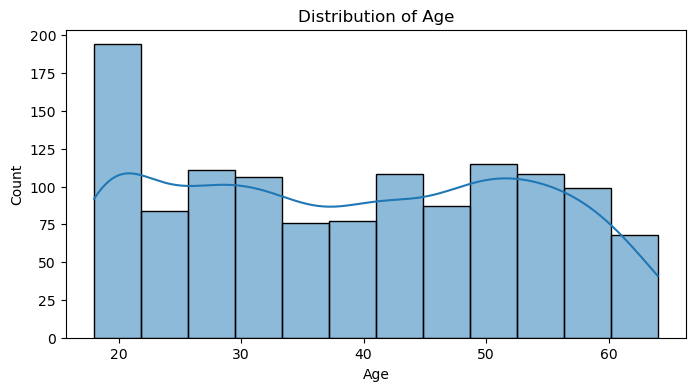

In [58]:
# age 컬럼의 결측치를 어떻게 채우면 좋을지 판단하기 위해, 분포를 확인한다.
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#왼쪽(20대)에 몰림이 있기에 전체적으로 완벽하게 대칭은 아니지만 엄청 심하게 찌그러진 것은 아니다.
#그러나 20대에 많이 몰려있으니, 평균이 실제 연령을 대표하지 못할 가능성이 있다. 평균과 중앙값을 비교해보고, 비슷하면 '평균'으로 결측치를 채우는 판단.

In [59]:
# 평균과 중앙값이 비슷한지 확인.
print('평균 (mean):', df['age'].mean())
print('중앙값 (median):', df['age'].median())

# 평균과 중앙값이 비슷함으로 데이터가 크게 치우치지 않았다는 의미. 평균이 데이터를 잘 대표할 수 있다고 판단.

평균 (mean): 39.058394160583944
중앙값 (median): 39.0


In [60]:
# age 컬럼의 결측치를 평균으로 채우기.
df['age'].fillna(df['age'].mean(), inplace=True)

children
0.00    574
1.00    324
3.00    157
2.00     27
4.00     25
5.00     18
Name: count, dtype: int64


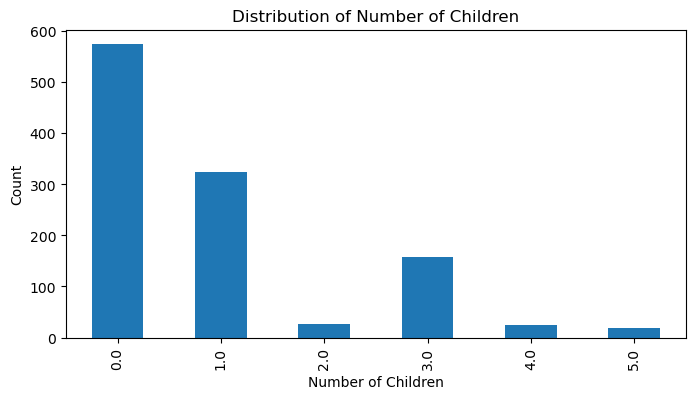

In [61]:
# children 값별 개수 셈으로써, 어떤 값으로 결측치를 채워야할지 판단하기

print(df['children'].value_counts())

# 시각화
plt.figure(figsize=(8,4))
df['children'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

#자녀가 0명인 보험계약자가 압도적으로 많다는 것을 볼 수 있다.

In [62]:
#children은 이산형 데이터이다. 자녀의 수가 소수점이 나오는 것은 부자연스럽다.
#가장 자주 등장하는 값인 최빈값이 데이터의 대표성을 잘 반영한다고 판단.

df['children'].fillna(df['children'].mode()[0], inplace=True)

In [63]:
#마지막으로 region 컬럼의 결측치를 해결한다. 
#region은 범주형 데이터이다. 만약 최빈값으로 채우게 된다면 특정지역 편향이라는 문제가 생길 수 있다.
#따라서 'Unknown' 으로 채우거나, 예측 모델로 region을 추정하는 방법이 있다. 우선 예측 모델의 효과가 좋다면 예측모델을 사용해서 추정한다.
#지역마다 charges가 다른지를 확인하는 ANOVA (수치형 변수의 그룹 차이 검정) -> p < 0.05일 때 지역별 charges 차이가 유의미하다.

# region, charges 모두 결측 없는 행만 추출
clean_data = df[['region', 'charges']].dropna()

# 그룹별 데이터 만들기
groups = [clean_data[clean_data['region'] == r]['charges'] for r in clean_data['region'].unique()]

# ANOVA 수행
stat, p = f_oneway(*groups)
print('p-value =', p)

# p-value가 0.41이 나왔다. p-value에 의하면 설명력이 없다.

p-value = 0.4103013304067413


In [64]:
#region 컬럼의 결측값은 'Unknown'으로 채운다.
df['region'].fillna('Unknown', inplace=True)

In [65]:
#결측치 정상적으로 처리했는지 확인
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## (3) **[이상치 처리]** `이상치 존재여부 확인 및 처리`

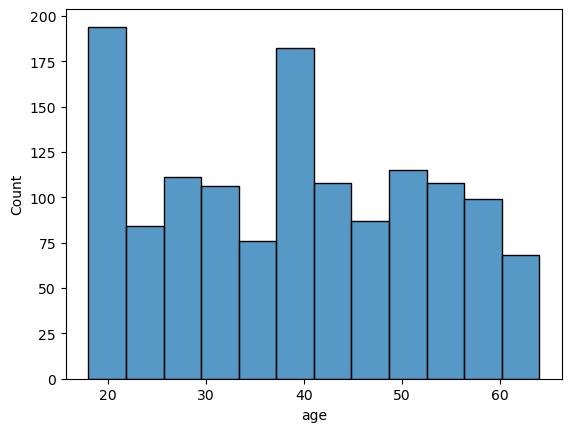

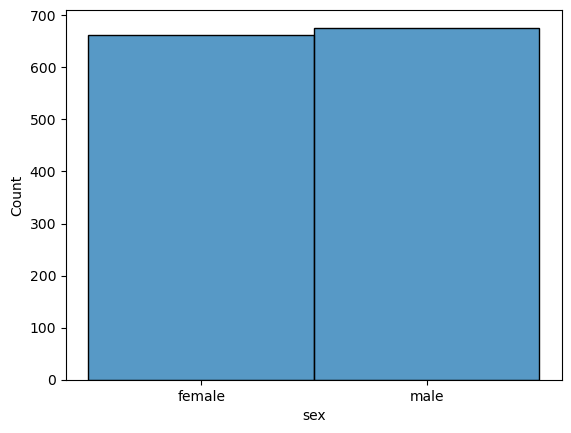

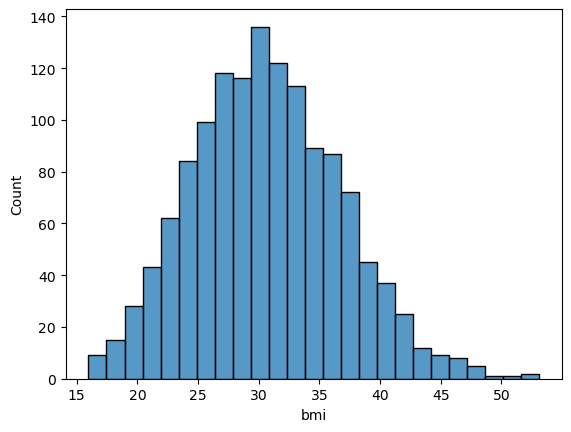

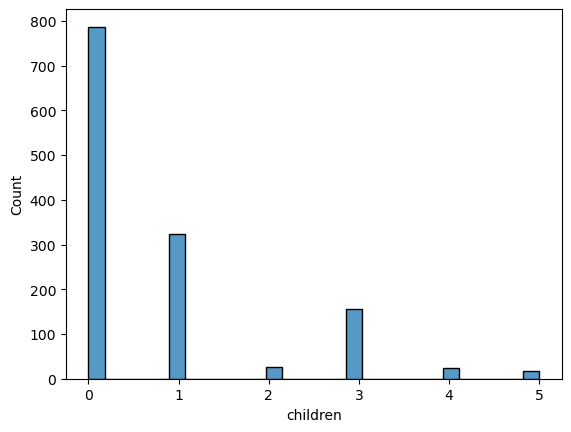

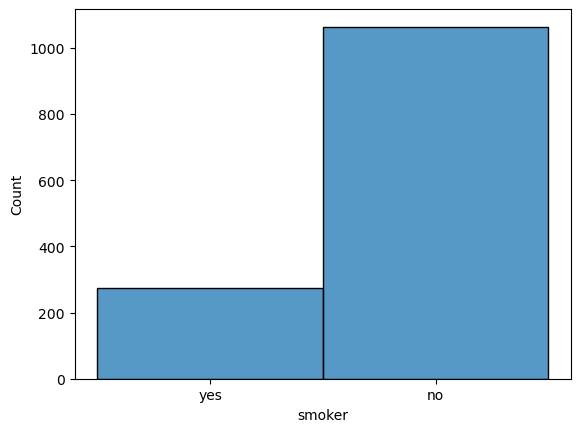

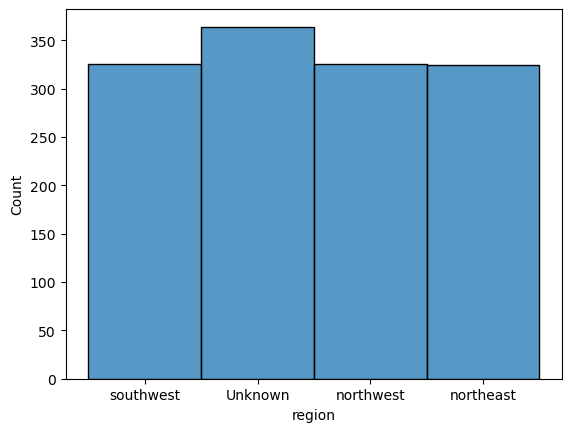

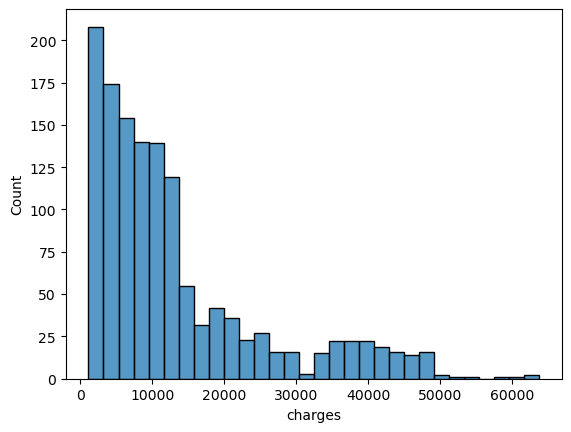

In [67]:
#전통적인 방법으로 이상치가 있는지 여부를 확인한다.
# 모든 column들의 히스토그램(분포) 그리기
for col in df.columns:
    sns.histplot(data=df, x =col)
    plt.show()

In [68]:
# age: 이상치 x 현실적인 나이 범위 안에 있고 특정 값만 튀는 현상도 없다. 이상치 처리 필요 없다.
# sex: 값이 두개밖에 없는 범주형 데이터라, 이상치라는 개념이 적용되지 않음. 이상치 처리 필요 없다.
# bmi는 연속형 수치 데이터로, 거의 종모양.(정규분포랑 비슷함) 
# 보통 BMI > 35.5은 의학적으로 고도 비만으로 간주되지만, 데이터 특성상 자연스러운 범위 내에 있는 것으로 판단되어 별도 제거 없이 유지.

## (4) **[자료형 변환]** 비숫자형 데이터의 처리

In [70]:
#age, bmi, children은 수치형 유지. 그대로 사용한다.
# sex, smoker, region은 범주형이므로 수치형으로 변환이 필요하다. 

# 여자는 0, 남자1, age, bmi, children은 수치형 유지. 그대로 사용한다.
# sex, smoker, region은 범주형이므로 수치형으로 변환이 필요하다. 
#특히 region은  One-Hot Encoding(더미 변수)로 바꿔야 한다. 

# 여자는 0, 남자 1 -> *** 이거 df 데이터로 할 거면 순서를 좀 앞으로 보내야한다.
df['sex'] = df['sex'].map({'female':0,'male':1})

# 흡연자는 0, 비흡연자는 1 -> *** 이거 df 데이터로 할 거면 순서를 좀 앞으로 보내야한다.
df['smoker'] = df['smoker'].map({'no':0,'yes':1})

# region (One-hot Encoding)
df = pd.get_dummies(df, columns=['region'], drop_first=False)

# True/False -> 0/1로 변환만 수행
df[['region_Unknown','region_northeast', 'region_northwest', 'region_southwest']] = df[['region_Unknown','region_northeast', 'region_northwest', 'region_southwest']].astype(int)


print(df.head())

    age  sex   bmi  children  smoker   charges  region_Unknown  \
0 19.00    0 27.90      0.00       1 16,884.92               0   
1 18.00    1 33.77      1.00       0  1,725.55               1   
2 28.00    1 33.00      3.00       0  4,449.46               1   
3 33.00    1 22.70      0.00       0 21,984.47               0   
4 32.00    1 28.88      0.00       0  3,866.86               0   

   region_northeast  region_northwest  region_southwest  
0                 0                 0                 1  
1                 0                 0                 0  
2                 0                 0                 0  
3                 0                 1                 0  
4                 0                 1                 0  


## (6) **[데이터 변환]** `필요한 해석과 변수들의 특성`에 맞게 변주형/연속형 변환 처리

In [72]:
# 현재 사용 중인 변수들은 모두 연속형 또는 범주형 구조가 명확하므로 별도 변환은 하지 않음
# 예를 들어, age는 연속형, sex/smoker/region은 이미 범주형 처리 완료

## (5) **[데이터 분리]** `Train & Test`로만 분리하며, 각각의 비율은 `80% & 20%`로 진행

In [74]:
#종속변수로 사용할 charges
# 나머지 컬럼을 모두 독립변수로 지정
#종속변수와 독립변수를 출력하기
Y_colname = ['charges']
X_colname = [x for x in df.columns if x not in Y_colname]
Y_colname, X_colname

(['charges'],
 ['age',
  'sex',
  'bmi',
  'children',
  'smoker',
  'region_Unknown',
  'region_northeast',
  'region_northwest',
  'region_southwest'])

In [75]:
#sklearn 패키지 내 model_selection 모듈에서 train_test_split 함수를 호출하기
#train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
train_test_split(df[X_colname], df[Y_colname], test_size = 0.2, random_state = 123)

[       age  sex   bmi  children  smoker  region_Unknown  region_northeast  \
 67   40.00    1 26.32      1.00       0               0                 0   
 736  39.06    0 38.39      0.00       1               1                 0   
 310  50.00    1 26.60      0.00       0               0                 0   
 963  46.00    1 24.80      3.00       0               0                 1   
 680  21.00    0 17.40      1.00       0               0                 0   
 ...    ...  ...   ...       ...     ...             ...               ...   
 1238 39.06    1 22.70      3.00       0               0                 1   
 1147 20.00    0 31.92      0.00       0               0                 0   
 106  19.00    0 28.40      1.00       0               0                 0   
 1041 18.00    1 23.09      0.00       0               0                 1   
 1122 53.00    0 36.86      3.00       1               0                 0   
 
       region_northwest  region_southwest  
 67               

In [76]:
#train_test_split 함수를 사용하여 X_train, X_test, Y_train, Y_test 4개의 집단으로 구분하기
X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname], test_size = 0.2, random_state = 123)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1070, 9) (1070, 1)
(268, 9) (268, 1)


In [77]:
#미래 예측값인 X_test, Y_test를 출력하기
display(X_test, Y_test)

,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
650,49.00,0,42.68,0.00,0,1,0,0,0
319,32.00,1,37.34,1.00,0,0,1,0,0
314,27.00,0,31.40,0.00,1,0,0,0,1
150,35.00,1,24.13,1.00,0,0,0,1,0
336,60.00,1,25.74,0.00,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
873,43.00,1,30.10,1.00,0,0,0,0,1
746,34.00,1,27.00,0.00,0,0,0,0,1
275,47.00,0,26.60,0.00,0,0,1,0,0
186,26.00,0,29.92,0.00,0,1,0,0,0


,charges
650,"9,800.89"
319,"4,667.61"
314,"34,838.87"
150,"5,125.22"
336,"12,142.58"
...,...
873,"6,849.03"
746,"11,737.85"
275,"9,715.84"
186,"3,981.98"


## (7) **[스케일 조정]** 선호하는 `스케일링도 반드시 실행`하되 `종류는 자유 선택`

In [79]:
#변수의 크기를 조정한다. 크기로 인한 영향을 막기 위해서.
#4가지 중 1
#X_train 데이터의 수치 크기 범위 확인 
X_train

,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
67,40.00,1,26.32,1.00,0,0,0,1,0
736,39.06,0,38.39,0.00,1,1,0,0,0
310,50.00,1,26.60,0.00,0,0,0,0,1
963,46.00,1,24.80,3.00,0,0,1,0,0
680,21.00,0,17.40,1.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1238,39.06,1,22.70,3.00,0,0,1,0,0
1147,20.00,0,31.92,0.00,0,0,0,1,0
106,19.00,0,28.40,1.00,0,0,0,0,1
1041,18.00,1,23.09,0.00,0,0,1,0,0


In [80]:
#스케일링 전처리 코드 정리 및 결과 생성
scaler = preprocessing.MinMaxScaler()
scaler_fit = scaler.fit(X_train)
X_train_fes = pd.DataFrame(scaler_fit.transform(X_train),
                           index=X_train.index, columns=X_train.columns)
X_test_fes = pd.DataFrame(scaler_fit.transform(X_test),
                           index=X_test.index, columns=X_test.columns)
display(X_train_fes, X_test_fes)

,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
67,0.48,1.00,0.28,0.20,0.00,0.00,0.00,1.00,0.00
736,0.46,0.00,0.60,0.00,1.00,1.00,0.00,0.00,0.00
310,0.70,1.00,0.29,0.00,0.00,0.00,0.00,0.00,1.00
963,0.61,1.00,0.24,0.60,0.00,0.00,1.00,0.00,0.00
680,0.07,0.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...
1238,0.46,1.00,0.18,0.60,0.00,0.00,1.00,0.00,0.00
1147,0.04,0.00,0.43,0.00,0.00,0.00,0.00,1.00,0.00
106,0.02,0.00,0.33,0.20,0.00,0.00,0.00,0.00,1.00
1041,0.00,1.00,0.19,0.00,0.00,0.00,1.00,0.00,0.00


,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
650,0.67,0.00,0.72,0.00,0.00,1.00,0.00,0.00,0.00
319,0.30,1.00,0.58,0.20,0.00,0.00,1.00,0.00,0.00
314,0.20,0.00,0.42,0.00,1.00,0.00,0.00,0.00,1.00
150,0.37,1.00,0.22,0.20,0.00,0.00,0.00,1.00,0.00
336,0.91,1.00,0.26,0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
873,0.54,1.00,0.38,0.20,0.00,0.00,0.00,0.00,1.00
746,0.35,1.00,0.30,0.00,0.00,0.00,0.00,0.00,1.00
275,0.63,0.00,0.29,0.00,0.00,0.00,1.00,0.00,0.00
186,0.17,0.00,0.38,0.00,0.00,1.00,0.00,0.00,0.00


In [81]:
#변환된 최종 X_train, X_test 통계량 확인하기
display(X_train_fes.describe(), X_test_fes.describe())

,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
count,"1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00","1,070.00"
mean,0.46,0.51,0.40,0.16,0.20,0.28,0.24,0.25,0.23
std,0.30,0.50,0.16,0.24,0.40,0.45,0.43,0.43,0.42
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.20,0.00,0.28,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,1.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.72,1.00,0.50,0.20,0.00,1.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,age,sex,bmi,children,smoker,region_Unknown,region_northeast,region_northwest,region_southwest
count,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00,268.00
mean,0.47,0.50,0.40,0.14,0.22,0.25,0.26,0.21,0.29
std,0.28,0.50,0.17,0.22,0.42,0.43,0.44,0.40,0.46
min,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.24,0.00,0.26,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.46,1.00,0.40,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.70,1.00,0.51,0.20,0.00,0.00,1.00,0.00,1.00
max,1.00,1.00,0.85,1.00,1.00,1.00,1.00,1.00,1.00


## (8) **[모델 입력 변환]** `알고리즘이 이해가능한 형태`로 변환

In [83]:
# 위에서 관련 전처리 및 입력 파라미터에 맞게 데이터를 변환 완료하였습니다.

## **[전처리 함수화1]** 위 모든 전처리 과정을 함수로 작성 및 실행

```python
- 함수이름: preprocessing_ME
- 함수입력: df
- 함수출력: X_train, X_test, Y_train, Y_test, df_prep
- 출력형태: X는 모두 array, Y는 모두 dataframe, df_prep는 dataframe
- 결과확인: X_train.head(), X_test.head(), Y_train.head(), Y_test.head(), df_prep.describe().T
```

In [85]:
# preprocessing_ME 함수 작성

def preprocessing_ME(df):
    df = df.copy()

    #데이터 결합 필요x
    
    #결측치 처리
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['children'].fillna(df['children'].mode()[0], inplace=True)
    df['region'].fillna('Unknown', inplace=True)

    #이상치 처리 필요x

    #데이터변환
    df['sex'] = df['sex'].map({'female':0,'male':1})
    df['smoker'] = df['smoker'].map({'no':0,'yes':1})
    df = pd.get_dummies(df, columns=['region'], drop_first=False)
    df[['region_Unknown','region_northeast', 'region_northwest', 'region_southwest']] = df[['region_Unknown','region_northeast', 'region_northwest', 'region_southwest']].astype(int)

    #데이터 분리
    Y_colname = ['charges']
    X_colname = [x for x in df.columns if x not in Y_colname]
    Y_colname, X_colname


    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname], test_size = 0.2, random_state = 123)

    #스케일링
    scaler = preprocessing.MinMaxScaler()
    scaler_fit = scaler.fit(X_train)
    X_train_fes = pd.DataFrame(scaler_fit.transform(X_train),
                               index=X_train.index, columns=X_train.columns)
    X_test_fes = pd.DataFrame(scaler_fit.transform(X_test),
                               index=X_test.index, columns=X_test.columns)   

    df_prep = df.copy()

    return X_train_fes, X_test_fes, Y_train, Y_test, df_prep

In [86]:
# 데이터 로딩 후 preprocessing_ME 함수 사용해서 결과를 출력하고 확인
location = 'Regression_InsurancePremium.csv'
df = pd.read_csv(location)

X_train, X_test, Y_train, Y_test, df_prep = preprocessing_ME(df)

X_train.head(), X_test.head(), Y_train.head(), Y_test.head(), df_prep.describe().T

(     age  sex  bmi  children  smoker  region_Unknown  region_northeast  \
 67  0.48 1.00 0.28      0.20    0.00            0.00              0.00   
 736 0.46 0.00 0.60      0.00    1.00            1.00              0.00   
 310 0.70 1.00 0.29      0.00    0.00            0.00              0.00   
 963 0.61 1.00 0.24      0.60    0.00            0.00              1.00   
 680 0.07 0.00 0.04      0.20    0.00            0.00              0.00   
 
      region_northwest  region_southwest  
 67               1.00              0.00  
 736              0.00              0.00  
 310              0.00              1.00  
 963              0.00              0.00  
 680              0.00              1.00  ,
      age  sex  bmi  children  smoker  region_Unknown  region_northeast  \
 650 0.67 0.00 0.72      0.00    0.00            1.00              0.00   
 319 0.30 1.00 0.58      0.20    0.00            0.00              1.00   
 314 0.20 0.00 0.42      0.00    1.00            0.00           

## **[전처리 함수화2]** ChatGPT에게 지시하여 위 함수와 동일한 입출력과 전처리 결과 생성


```python
- 함수이름: preprocessing_ChatGPT
- 함수입력: 위에서 작성한 함수와 동일
- 함수출력: 위에서 작성한 함수와 동일
- 출력형태: 위에서 작성한 함수와 동일
- 결과확인: 위에서 작성한 함수와 동일
- ChatGPT모델: GPT-4o 추천하나 아무거나 무관
```

In [88]:
# ChatGPT '무엇이든 물어보세요' 프롬프트 최종 지시사항 주석으로 작성

"""
아래 조건을 충족하는 전처리 함수 preprocessing_ChatGPT(df)를 파이썬 코드로 만들어줘.  

1. 'age'는 평균으로, 'children'은 최빈값으로 결측치 대체
2. 'region'은 결측치를 'Unknown'으로 채움
3. 'sex'는 'female': 0, 'male': 1로 변환
4. 'smoker'는 'no': 0, 'yes': 1로 변환
5. 'region'은 drop_first=False로 One-Hot Encoding 수행
6. 변환된 region 컬럼은 정수형(int)으로 변환
7. 종속변수 'charges'와 독립변수를 분리
8. train_test_split으로 8:2 분리 (random_state=123)
9. MinMaxScaler로 X_train과 X_test를 정규화하고, DataFrame 형태로 복원
10. 최종적으로 X_train_fes, X_test_fes, Y_train, Y_test, 전처리된 df(df_prep)를 return

"""

"\n아래 조건을 충족하는 전처리 함수 preprocessing_ChatGPT(df)를 파이썬 코드로 만들어줘.  \n\n1. 'age'는 평균으로, 'children'은 최빈값으로 결측치 대체\n2. 'region'은 결측치를 'Unknown'으로 채움\n3. 'sex'는 'female': 0, 'male': 1로 변환\n4. 'smoker'는 'no': 0, 'yes': 1로 변환\n5. 'region'은 drop_first=False로 One-Hot Encoding 수행\n6. 변환된 region 컬럼은 정수형(int)으로 변환\n7. 종속변수 'charges'와 독립변수를 분리\n8. train_test_split으로 8:2 분리 (random_state=123)\n9. MinMaxScaler로 X_train과 X_test를 정규화하고, DataFrame 형태로 복원\n10. 최종적으로 X_train_fes, X_test_fes, Y_train, Y_test, 전처리된 df(df_prep)를 return\n\n"

In [89]:
# ChatGPT가 생성한 preprocessing_ChatGPT 함수 복사 붙여넣기
# preprocessing_ME 함수와 동일하면 안됨! (동일할수가 없음...)


def preprocessing_ChatGPT(df):
    """
    Preprocess the insurance DataFrame according to specified rules:
      1. Impute 'age' with mean, 'children' with mode
      2. Fill missing 'region' with 'Unknown'
      3. Encode 'sex' and 'smoker' as binary
      4. One-hot encode 'region' (keep all categories)
      5. Split into train/test (80/20, random_state=123)
      6. Scale features with MinMaxScaler and restore DataFrame
      7. Return X_train_fes, X_test_fes, Y_train, Y_test, df_prep
    """
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split

    # 1. Copy and impute numeric columns using sklearn’s SimpleImputer
    df_prep = df.copy()
    age_imp = SimpleImputer(strategy='mean')
    df_prep[['age']] = age_imp.fit_transform(df_prep[['age']])
    children_imp = SimpleImputer(strategy='most_frequent')
    df_prep[['children']] = children_imp.fit_transform(df_prep[['children']])

    # 2. Fill region missing with 'Unknown'
    df_prep['region'] = df_prep['region'].fillna('Unknown')

    # 3. Binary mapping for 'sex' and 'smoker'
    mapping = {
        'sex':    {'female': 0, 'male': 1},
        'smoker': {'no':     0, 'yes':  1}
    }
    for col, m in mapping.items():
        df_prep[col] = df_prep[col].map(m)

    # 4. One-hot encode 'region' (drop_first=False) and ensure ints
    region_ohe = pd.get_dummies(df_prep['region'], prefix='region', drop_first=False).astype(int)
    df_prep = df_prep.drop('region', axis=1).join(region_ohe)

    # 5. Separate features and target
    X = df_prep.drop('charges', axis=1)
    y = df_prep['charges']

    # 6. Train-test split (80/20)
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )

    # 7. Scale with MinMaxScaler and restore DataFrame structure
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled  = scaler.transform(X_test)

    X_train_fes = pd.DataFrame(
        X_train_scaled, columns=X_train.columns, index=X_train.index
    )
    X_test_fes = pd.DataFrame(
        X_test_scaled, columns=X_test.columns, index=X_test.index
    )

    # Return processed train/test splits and the full preprocessed DataFrame
    return X_train_fes, X_test_fes, Y_train, Y_test, df_prep


In [90]:
# 데이터 로딩 후 preprocessing_ChatGPT 함수 사용해서 결과를 출력하고 확인

location = 'Regression_InsurancePremium.csv'
df = pd.read_csv(location)

X_train_GPT, X_test_GPT, Y_train_GPT, Y_test_GPT, df_prep_GPT = preprocessing_ChatGPT(df)

X_train_GPT.head(), X_test_GPT.head(), Y_train_GPT.head(), Y_test_GPT.head(), df_prep_GPT.describe().T

(     age  sex  bmi  children  smoker  region_Unknown  region_northeast  \
 67  0.48 1.00 0.28      0.20    0.00            0.00              0.00   
 736 0.46 0.00 0.60      0.00    1.00            1.00              0.00   
 310 0.70 1.00 0.29      0.00    0.00            0.00              0.00   
 963 0.61 1.00 0.24      0.60    0.00            0.00              1.00   
 680 0.07 0.00 0.04      0.20    0.00            0.00              0.00   
 
      region_northwest  region_southwest  
 67               1.00              0.00  
 736              0.00              0.00  
 310              0.00              1.00  
 963              0.00              0.00  
 680              0.00              1.00  ,
      age  sex  bmi  children  smoker  region_Unknown  region_northeast  \
 650 0.67 0.00 0.72      0.00    0.00            1.00              0.00   
 319 0.30 1.00 0.58      0.20    0.00            0.00              1.00   
 314 0.20 0.00 0.42      0.00    1.00            0.00           

# **Applying Algorithms:** Linear Regression, Ramdom Forest, XGBoost

**1)** `preprocessing_ME` 전처리 데이터에 `Linear Regression 알고리즘을` 사용하여 `학습 및 예측` 진행

- 예측은 Train & Test 모두에 대해 실행

---

**2)** `Train & Test` 데이터의 예측 결과를 `시각화로 표현`하여 얼마나 정확한지 확인

- Train & Test 각각에 대해 정답 Y와 예측 Y를 동시에 그려 얼마나 유사한지 비교
- 비교 성능이 시각적으로 어떠한지 생각한 후 주석으로 의견을 작성

---

**3)** `Train & Test 모두의 검증지표와 잔차를 통해 성능`을 확인

- `검증지표`는 아래와 같이 모두 6개를 모두 사용하고, Train & Test 성능이 어떠한지 `주석으로 비교 작성`
> (1) RMSE (Root Mean Squared Error)
>
> (2) MSPE (Mean Squared Percentage Error)
>
> (3) MAE (Mean Absolute Error)
>
> (4) MAPE (Mean Absolute Percentage Error)
>
> (5) MedAE (Median Absolute Error)
>
> (6) MedAPE (Median Absolute Percentage Error)

- `잔차를 시각화`하여 `어떤 패턴이 남아 있는지 향후 어떤 데이터가 필요할지` 주석으로 의견 작성

---

**4)** `preprocessing_ChatGPT` 전처리 데이터로 변경해서 `1) + 2) + 3)` 과정을 모두 실행 및 성능 비교

- `정답 Y와 예측 Y의 시각화`로 `어떤 전처리 함수가 성능이 좋은지 주석으로 작성`
- `검증지표`들로 `어떤 전처리 함수가 성능이 좋은지 주석으로 작성`

---

**5-1)** 향후 수업에서 배우게 될 `대표적 머신러닝 알고리즘`을 사용하여 `1) + 2) + 3) + 4)` 과정을 모두 실행 및 성능 비교

- 전처리 함수는 `preprocessing_ME`와 `preprocessing_ChatGPT` 중 4) 과정에서 성능이 높았던 함수로 진행
- `Random Forest` 알고리즘의 학습 및 예측 부분은 ChatGPT에게 `프롬프트로 지시`하고 `생성된 모델링 코드를 활용`
- `Random Forest` 알고리즘을 사용해서 `Train & Test`의 `검증지표`를 통해 선형회귀분석 대비 성능이 어떤지 주석으로 작성

---

**5-2)** 향후 수업에서 배우게 될 `대표적 머신러닝 알고리즘`을 사용하여 `1) + 2) + 3) + 4)` 과정을 모두 실행 및 성능 비교

- 전처리 함수는 `preprocessing_ME`와 `preprocessing_ChatGPT` 중 4) 과정에서 성능이 높았던 함수로 진행
- `XGBoost` 알고리즘의 학습 및 예측 부분은 ChatGPT에게 `프롬프트로 지시`하고 `생성된 모델링 코드를 활용`
- `XGBoost` 알고리즘을 사용해서 `Train & Test`의 `검증지표`를 통해 선형회귀분석 대비 성능이 어떤지 주석으로 작성

---

**6)** 모델링 방향 정리

- `검증지표`를 기준으로 `Train & Test` 각각에 대해 3가지 알고리즘 중 `어떤 알고리즘이 예측력이 높은지` 주석으로 작성
- 실제 비즈니스에 활용하기 위해선 `Train & Test` 중 `어떤 데이터의 예측력이 더욱 중요한지 + 최종 활용 알고리즘` 주석으로 작성

## 1) `비즈니스 목적` 달성을 위해 `Linear Regression 알고리즘을` 사용하여 `학습 및 예측` 진행

In [93]:
# 학습 과정

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model_lr = sm.OLS(Y_train, X_train).fit()
model_lr.summary()

#R-squaered 를 보면 73%
#F검정의 p 벨류 거의 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     359.8
Date:                Wed, 07 May 2025   Prob (F-statistic):          5.59e-296
Time:                        15:27:58   Log-Likelihood:                -10870.
No. Observations:                1070   AIC:                         2.176e+04
Df Residuals:                    1061   BIC:                         2.180e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1706.9691    493.152     -3.461      0.001   -2674.633    -739.305
age               1.178e+04    652.406     18.052      0.000    1.05e+04    1.31e+04
sex                -58.5271    385.836     -0.152      0.879    -815.616     698.561
bmi               1.278e+04   1247.657     10.240      0.000    1.03e+04    1.52e+04
children          1562.7315    798.542      1.957      0.051      -4.170    3129.633
smoker             2.35e+04    482.632     48.687      0.000    2.26e+04    2.44e+04
region_Unknown    -871.7273    380.289     -2.292      0.022   -1617.932    -125.522
region_northeast   182.3030    353.765      0.515      0.606    -511.856     876.462
region_northwest  -178.0946    343.507     -0.518      0.604    -852.124     495.935
region_southwest  -839.4502    362.204     -2.318      0.021   -1550.169    -128.732
==============================================================================
Omnibus:                      256.137   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.275
Skew:                           1.284   Prob(JB):                    1.35e-132
Kurtosis:                       5.652   Cond. No.                     8.83e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [94]:
# 예측 과정

Y_trpred = pd.DataFrame(model_lr.predict(X_train), columns = ['Pred'])
Y_tepred = pd.DataFrame(model_lr.predict(X_test), columns = ['Pred'])

## 2) `Train & Test` 데이터의 예측 결과를 `시각화로 표현`하여 얼마나 정확한지 확인

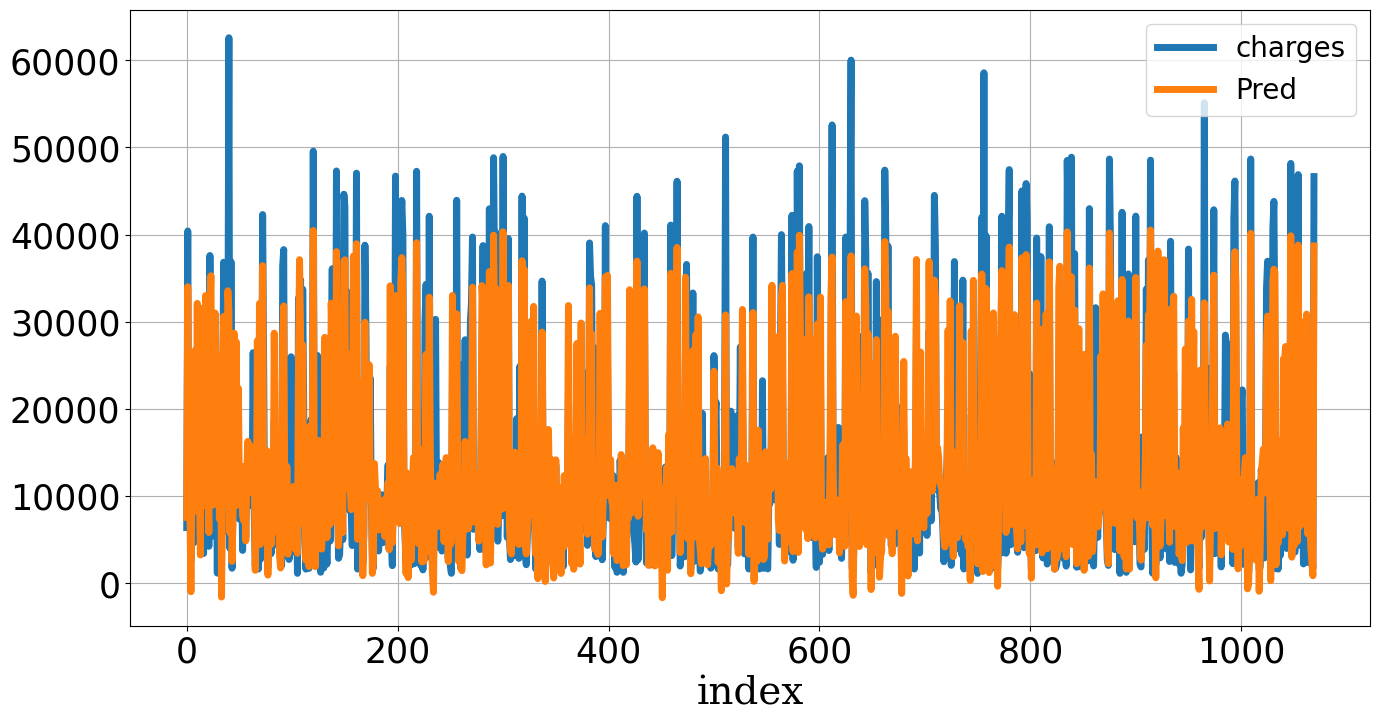

In [96]:
# Train 데이터 예측 시각화

def plot_prediction(Y_true_pred):
    plt.figure(figsize =(16,8))
    plt.plot(Y_true_pred, linewidth=5, label=Y_true_pred.columns)
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('index', fontname='serif', fontsize=28)
    
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()

plot_prediction(pd.concat([Y_train, Y_trpred], axis =1).reset_index().iloc[:,1:])


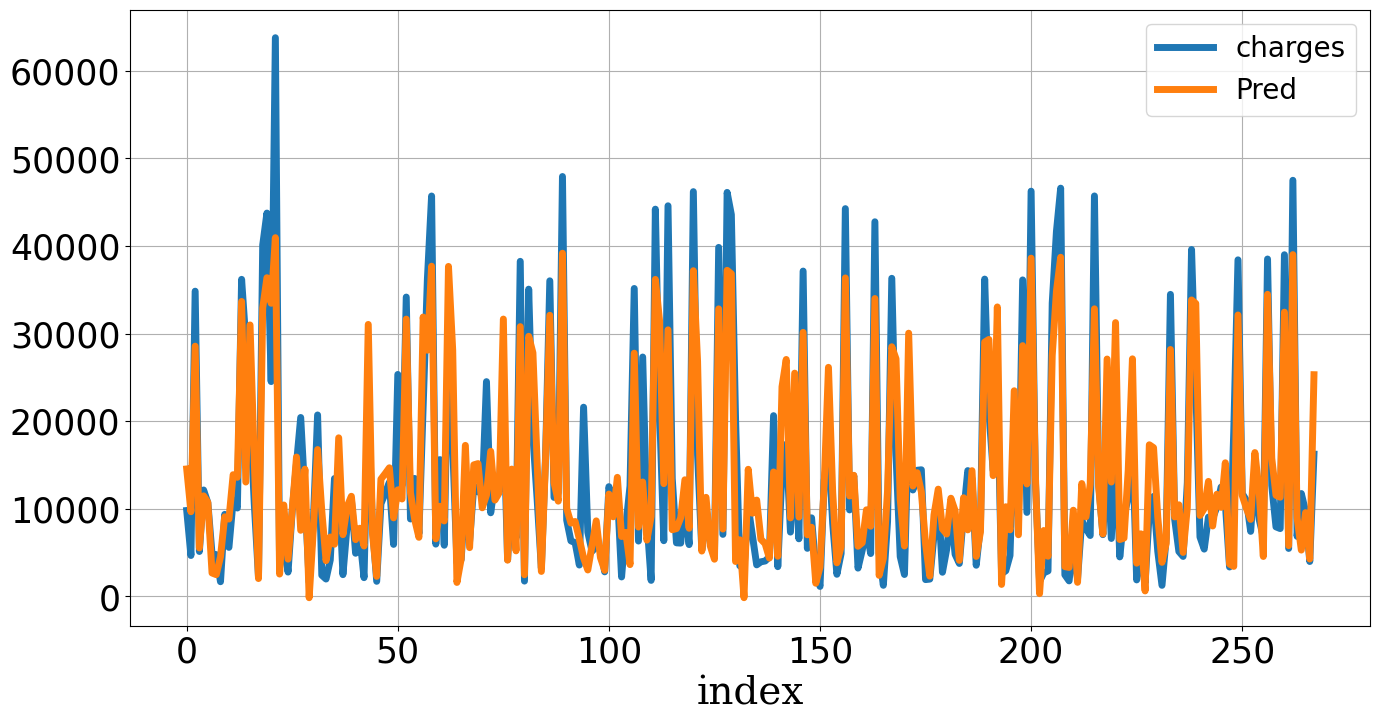

In [97]:
# Test 데이터 예측 시각화

plot_prediction(pd.concat([Y_test, Y_tepred], axis =1).reset_index().iloc[:,1:])


In [98]:
# 성능 의견 주석으로 작성


# Train 데이터 예측결과, 학습 데이터에서는 실제값(charges)과 예측값(Pred)이 전반적으로 유사한 패턴을 보이며 비교적 높은 설명력을 보였다.
# 특히 중간 수준의 보험료에서는 예측 정확도가 높았으며, R² = 0.731로 나타나, 전체 분산의 약 73.1%를 설명할 수 있음을 보여준다.
# 다만 고비용(high charges) 영역에서는 일부 예측 오차가 크게 나타나며, 이는 선형 회귀 모델의 한계일 수 있다.

# Test 데이터 예측 결과, 테스트 데이터에서도 전반적으로 실제값의 흐름과 예측값이 유사한 패턴을 유지했지만,
# 급격한 값의 변화 또는 극단값(outlier)에서는 오차가 눈에 띄게 커지는 구간이 관찰되었다.
# 이는 모델이 복잡한 비선형적 관계를 완전히 반영하지 못한다는 점을 의미한다.

## 3) `Train & Test 모두의 검증지표와 잔차를 통해 성능`을 확인

In [100]:
# Train 검증지표 6종 확인

# 1. 유효한 (음수 제거된) 예측값 인덱스 필터링
valid_tr_idx = Y_trpred['Pred'] > 0

# 2. 필터링된 정답값과 예측값 추출
Y_train_valid = Y_train[valid_tr_idx].squeeze().astype(float)
Y_trpred_valid = Y_trpred[valid_tr_idx]['Pred'].squeeze().astype(float)


# 3. 아주 작은 수 epsilon 정의 (0 나누기 방지용)
epsilon = 1e-10

RMSE_tr   = np.sqrt(mean_squared_error(Y_train_valid, Y_trpred_valid))
MSPE_tr   = np.mean(np.square((Y_train_valid - Y_trpred_valid) / (Y_train_valid + epsilon))) * 100
MAE_tr    = mean_absolute_error(Y_train_valid, Y_trpred_valid)
MAPE_tr   = mean_absolute_percentage_error(Y_train_valid, Y_trpred_valid) * 100
MedAE_tr  = np.median(np.abs(Y_train_valid - Y_trpred_valid))
MedAPE_tr = np.median(np.abs(Y_train_valid - Y_trpred_valid) / (Y_train_valid + epsilon)) * 100

pd.DataFrame(
    [[RMSE_tr, MSPE_tr, MAE_tr, MAPE_tr, MedAE_tr, MedAPE_tr]],
    index=['Train score'],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE']
)

,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Train score,"6,269.79",52.49,"4,376.36",45.42,"2,641.26",30.41


In [101]:
# Test 검증지표 6종 확인

# 1. 유효한 (음수 제거된) 예측값 인덱스 필터링
valid_te_idx = Y_tepred['Pred'] > 0

# 2. 필터링된 정답값과 예측값 추출
Y_test_valid = Y_test[valid_te_idx].squeeze().astype(float)
Y_tepred_valid = Y_tepred[valid_te_idx]['Pred'].squeeze().astype(float)

# 3. 아주 작은 수 epsilon 정의 (0 나누기 방지용)
epsilon = 1e-10

RMSE_te   = np.sqrt(mean_squared_error(Y_test_valid, Y_tepred_valid))
MSPE_te   = np.mean(np.square((Y_test_valid - Y_tepred_valid) / (Y_test_valid + epsilon))) * 100
MAE_te    = mean_absolute_error(Y_test_valid, Y_tepred_valid)
MAPE_te   = mean_absolute_percentage_error(Y_test_valid, Y_tepred_valid) * 100
MedAE_te  = np.median(np.abs(Y_test_valid - Y_tepred_valid))
MedAPE_te = np.median(np.abs(Y_test_valid - Y_tepred_valid) / (Y_test_valid + epsilon)) * 100

pd.DataFrame(
    [[RMSE_te, MSPE_te, MAE_te, MAPE_te, MedAE_te, MedAPE_te]],
    index=['Test Score'],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE']
)

,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Test Score,"5,619.47",44.86,"4,127.40",43.35,"2,828.63",28.16


In [102]:
# 성능 의견 주석으로 작성
# 1. 전반적 해석:
# - Train과 Test 모두에서 오차 지표(RMSE, MAE, MAPE 등)가 비교적 근접하게 나타남
# - 과적합 없이 안정적인 일반화 성능을 보여줌
# - 단, 오차 수치 자체는 여전히 높은 편으로, 모델 성능 자체는 개선 여지가 있음

# 2. RMSE (Root Mean Squared Error):
# - Train: 약 6,270 / Test: 약 5,620 → 학습과 테스트 간 RMSE 차이 적음
# - 예측값이 평균적으로 약 5천~6천 달러 정도의 오차를 가짐

# 3. MAPE (Mean Absolute Percentage Error):
# - Train: 45.42%, Test: 43.35% → 상대 오차도 유사
# - 40% 이상의 상대 오차는 실무에서 높은 편이므로 성능 개선 필요

# 4. MedAE / MedAPE:
# - 중앙값 기준 오차가 평균 오차보다 낮은 수치를 보임
# - 이는 이상값(outliers)의 영향이 있다는 것을 시사
# - 특히 Test 데이터에서 중앙값 기반 오차(MedAE)가 Train보다 약간 더 큼 → 데이터 편차 존재

# 5. MSPE:
# - Test의 MSPE(44.86%)가 Train(52.49%)보다 낮음
# - 이는 오히려 테스트 데이터에서 비율 기반 제곱 오차가 더 안정적으로 나왔음을 의미

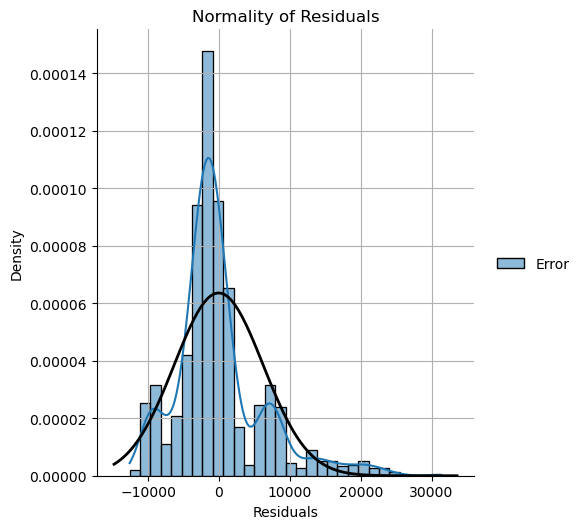

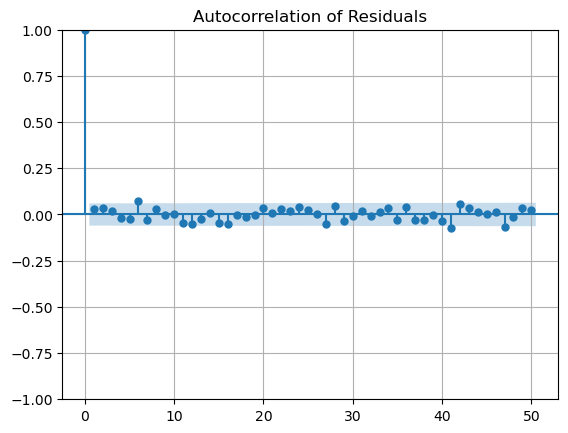

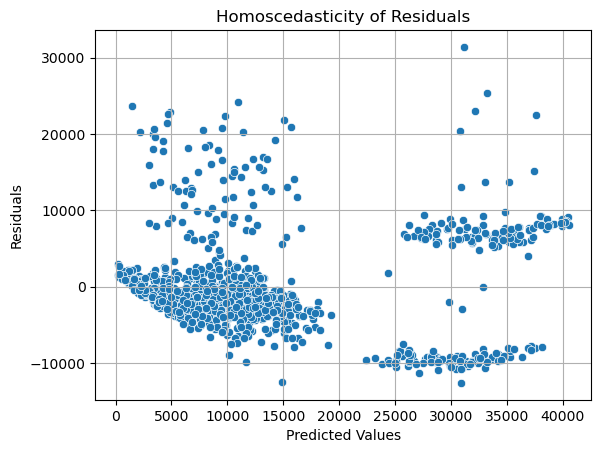

In [103]:
# Train 잔차 시각화를 통해 `어떤 패턴이 남아 있는지 향후 어떤 데이터가 필요할지` 주석으로 의견 작성

# 잔차 계산
Resid_tr = Y_train_valid.reset_index(drop=True) - Y_trpred_valid.reset_index(drop=True)
Resid_tr = pd.DataFrame(Resid_tr, columns=['Error'])

# 잔차의 정규분포성
sns.displot(Resid_tr, kde=True, stat='density', bins=30)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, Resid_tr['Error'].mean(), Resid_tr['Error'].std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Normality of Residuals')
plt.xlabel('Residuals')
plt.grid()
plt.show()

# 잔차의 자기상관성
plot_acf(Resid_tr, lags=50, use_vlines=True)
plt.title('Autocorrelation of Residuals')
plt.grid()
plt.show()

# 잔차의 등분산성
Y_trpred_valid_df = pd.DataFrame(Y_trpred_valid.values, columns=['Pred']).reset_index(drop=True)

# 병합
temp = pd.concat([Y_trpred_valid_df, Resid_tr.reset_index(drop=True)], axis=1)

# 산점도
sns.scatterplot(x='Pred', y='Error', data=temp)
plt.title('Homoscedasticity of Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


# 1. 정규성 (Normality of Residuals)
#    - 잔차 분포가 중심을 기준으로 대칭적이지만, 약간의 왜도(skewness)가 존재하며 
#      정규분포보다 뾰족한 형태를 보임 (leptokurtic).
#    - 이는 이상치(outlier)나 고비용 사례가 영향을 줄 수 있으므로, 이상치 제거 또는 로그 변환 등 고려 가능.

# 2. 자기상관성 (Autocorrelation of Residuals)
#    - ACF 플롯에서 대부분의 래그가 95% 신뢰구간 안에 존재함.
#    - 이는 잔차 간 자기상관이 거의 없음을 나타내며, 시간 의존성 문제는 크지 않음.

# 3. 등분산성 (Homoscedasticity of Residuals)
#    - 예측값이 증가함에 따라 잔차의 분산이 커지며, 두 구간으로 분리된 듯한 패턴이 관찰됨.
#    - 이는 이분산성(heteroscedasticity)을 시사하며, 모델이 고비용 환자 그룹에서 예측 성능이 낮을 수 있음을 의미.
#    - 향후 추가적으로 예측 변수에 '고비용 환자 여부' 또는 '진료 횟수', '만성 질환 수' 등의 특성을 포함시키면 도움이 될 수 있음.

## 4) `preprocessing_ChatGPT` 전처리 데이터로 변경해서 `1) + 2) + 3)` 과정을 모두 실행 및 성능 비교

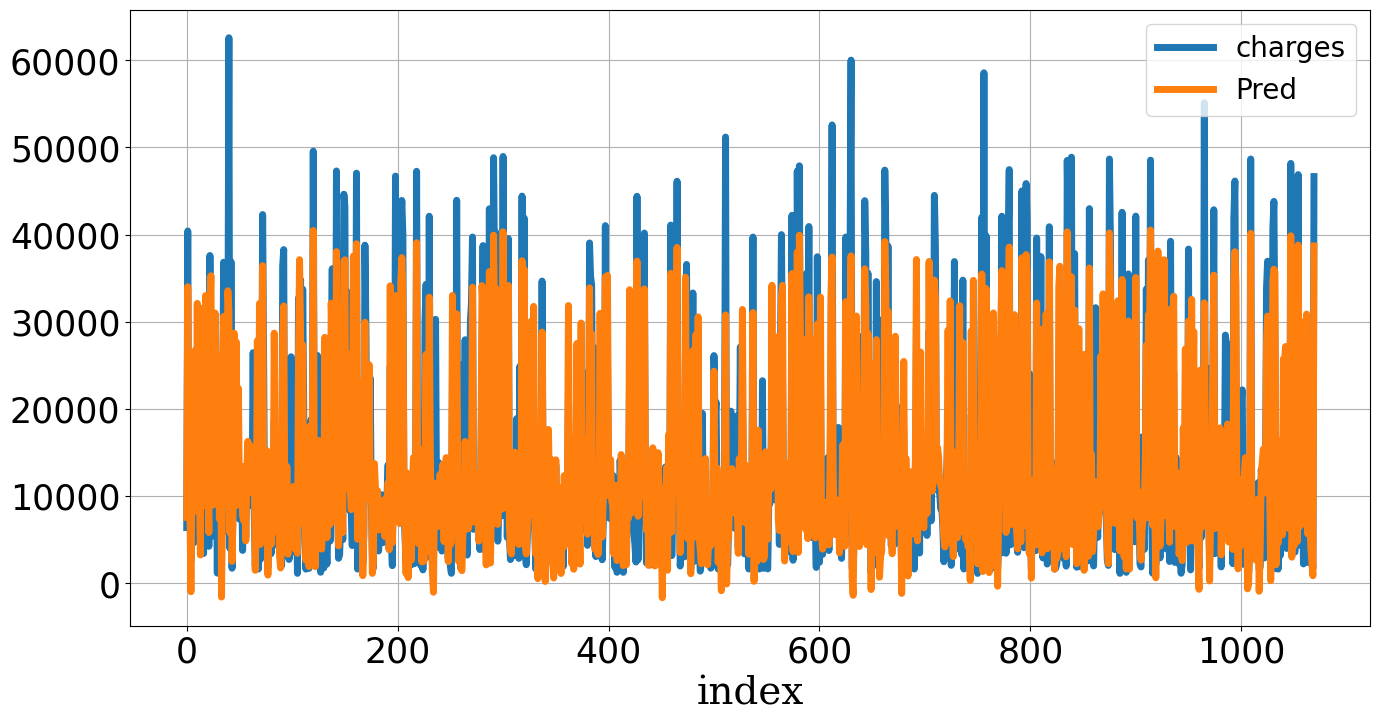

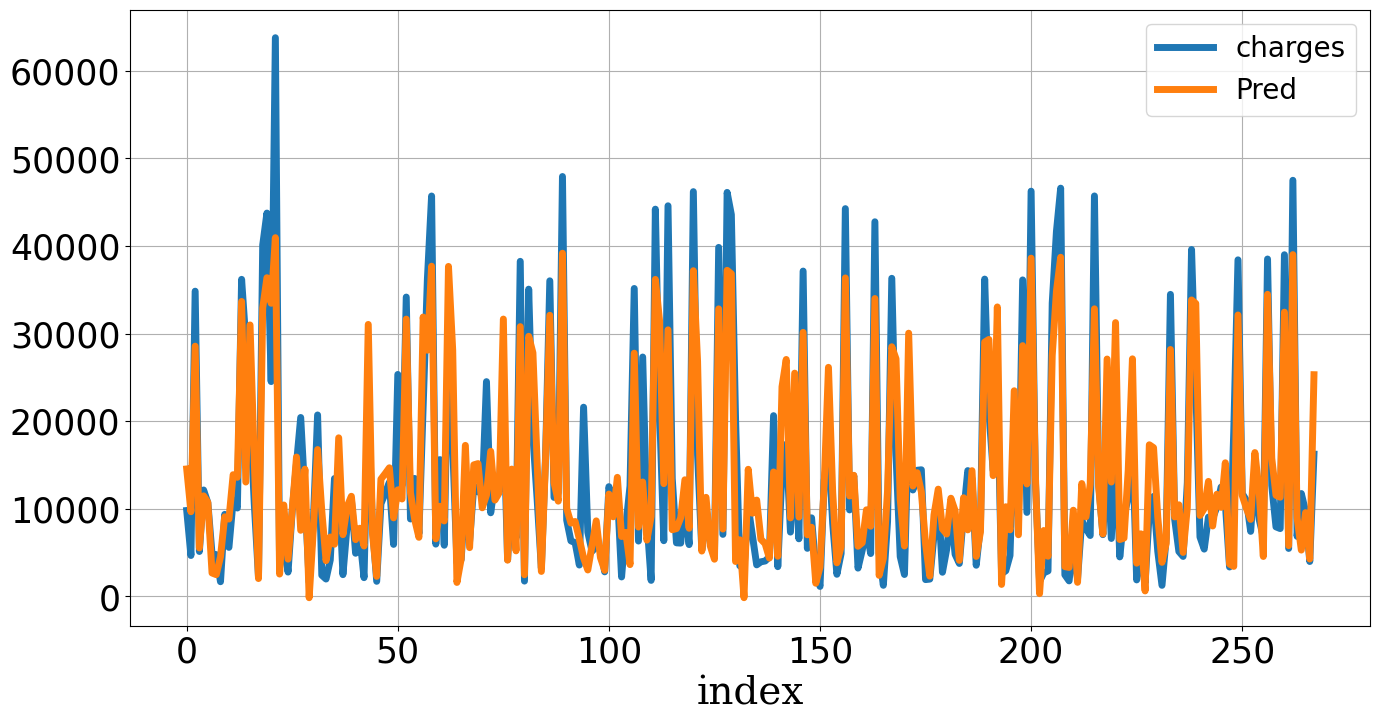

In [105]:
# Train & Test 데이터 예측 시각화

# 1) 상수항 추가
X_train_GPT_const = sm.add_constant(X_train_GPT)
X_test_GPT_const  = sm.add_constant(X_test_GPT)

# 2) OLS 모델 학습
model_lr_GPT = sm.OLS(Y_train_GPT, X_train_GPT_const).fit()

# 4) 학습/테스트 데이터 예측
Y_trpred_GPT = pd.DataFrame(
    model_lr_GPT.predict(X_train_GPT_const),
    columns=['Pred']
)
Y_tepred_GPT = pd.DataFrame(
    model_lr_GPT.predict(X_test_GPT_const),
    columns=['Pred']
)

def plot_prediction_GPT(Y_true_pred_GPT):
    plt.figure(figsize=(16, 8))
    plt.plot(
        Y_true_pred_GPT,
        linewidth=5,
        label=Y_true_pred_GPT.columns
    )
    plt.xticks(fontsize=25, rotation=0)
    plt.yticks(fontsize=25)
    plt.xlabel('index', fontname='serif', fontsize=28)
    plt.legend(fontsize=20)
    plt.grid()
    plt.show()

# Train 데이터의 실제값과 예측값을 합치고 인덱스를 정리한 뒤, 시각화 호출
df_train_vis_GPT = pd.concat([Y_train_GPT, Y_trpred_GPT], axis=1) \
                   .reset_index() \
                   .iloc[:, 1:]
plot_prediction_GPT(df_train_vis_GPT)

# Test 데이터의 실제값과 예측값을 합치고 인덱스를 정리한 뒤, 시각화 호출
df_test_vis_GPT = pd.concat([Y_test_GPT, Y_tepred_GPT], axis=1) \
                  .reset_index() \
                  .iloc[:, 1:]

plot_prediction_GPT(df_test_vis_GPT)

In [106]:
# 성능 의견 주석으로 작성

# 1. 학습 데이터 예측 결과 (Train)
# - 전반적으로 실제 'charges' 값과 예측값 'Pred' 간 차이가 큼
# - 특히 고액 청구 (예: 50,000 이상) 구간에서 예측이 잘 따라가지 못함
# - 과소예측이 다수 존재하며, 분산이 충분히 반영되지 않음
# → 과적합은 아니나, 모델의 설명력이 부족함을 의미함

# 2. 테스트 데이터 예측 결과 (Test)
# - 예측값이 실제값 추세를 어느 정도 따라가긴 하나, 전반적으로 편차가 큼
# - 예측이 일정한 범위(중간값 주변)에 집중되며, 고/저 extremes에 대해 성능 저하
# - 훈련 데이터와 비슷한 성능으로 일반화 성능도 부족한 편
# → 단순 선형회귀 모델로는 변수 간 비선형 관계 또는 상호작용을 잘 설명하지 못함


In [107]:
# Train & Test 검증지표 6종 확인

# 1. 유효한 (음수 제거된) 예측값 인덱스 필터링
valid_tr_idx_GPT = Y_trpred_GPT['Pred'] > 0

# 2. 필터링된 정답값과 예측값 추출
Y_train_valid_GPT = Y_train_GPT[valid_tr_idx_GPT].squeeze().astype(float)
Y_trpred_valid_GPT = Y_trpred_GPT[valid_tr_idx_GPT]['Pred'].squeeze().astype(float)

# 3. 아주 작은 수 epsilon 정의 (0 나누기 방지용)
epsilon = 1e-10

# 4. 검증 지표 계산
RMSE_tr_GPT   = np.sqrt(mean_squared_error(Y_train_valid_GPT, Y_trpred_valid_GPT))
MSPE_tr_GPT   = np.mean(np.square((Y_train_valid_GPT - Y_trpred_valid_GPT) / (Y_train_valid_GPT + epsilon))) * 100
MAE_tr_GPT    = mean_absolute_error(Y_train_valid_GPT, Y_trpred_valid_GPT)
MAPE_tr_GPT   = mean_absolute_percentage_error(Y_train_valid_GPT, Y_trpred_valid_GPT) * 100
MedAE_tr_GPT  = np.median(np.abs(Y_train_valid_GPT - Y_trpred_valid_GPT))
MedAPE_tr_GPT = np.median(np.abs(Y_train_valid_GPT - Y_trpred_valid_GPT) / (Y_train_valid_GPT + epsilon)) * 100

# 5. 결과 표로 출력
train_scores_GPT = pd.DataFrame(
    [[RMSE_tr_GPT, MSPE_tr_GPT, MAE_tr_GPT, MAPE_tr_GPT, MedAE_tr_GPT, MedAPE_tr_GPT]],
    index=['Train_Score_GPT'],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE']
)

# 1. 유효한 (음수 제거된) 예측값 인덱스 필터링
valid_te_idx_GPT = Y_tepred_GPT['Pred'] > 0

# 2. 필터링된 정답값과 예측값 추출
Y_test_valid_GPT = Y_test_GPT[valid_te_idx_GPT].squeeze().astype(float)
Y_tepred_valid_GPT = Y_tepred_GPT[valid_te_idx_GPT]['Pred'].squeeze().astype(float)

# 3. 아주 작은 수 epsilon 정의 (0 나누기 방지용)
epsilon = 1e-10

# 4. 검증 지표 계산
RMSE_te_GPT   = np.sqrt(mean_squared_error(Y_test_valid_GPT, Y_tepred_valid_GPT))
MSPE_te_GPT   = np.mean(np.square((Y_test_valid_GPT - Y_tepred_valid_GPT) / (Y_test_valid_GPT + epsilon))) * 100
MAE_te_GPT    = mean_absolute_error(Y_test_valid_GPT, Y_tepred_valid_GPT)
MAPE_te_GPT   = mean_absolute_percentage_error(Y_test_valid_GPT, Y_tepred_valid_GPT) * 100
MedAE_te_GPT  = np.median(np.abs(Y_test_valid_GPT - Y_tepred_valid_GPT))
MedAPE_te_GPT = np.median(np.abs(Y_test_valid_GPT - Y_tepred_valid_GPT) / (Y_test_valid_GPT + epsilon)) * 100

# 5. 결과 표로 출력
test_scores_GPT = pd.DataFrame(
    [[RMSE_te_GPT, MSPE_te_GPT, MAE_te_GPT, MAPE_te_GPT, MedAE_te_GPT, MedAPE_te_GPT]],
    index=['Test_Score_GPT'],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE']
)

pd.concat([train_scores_GPT, test_scores_GPT], axis=0)


,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Train_Score_GPT,"6,269.79",52.49,"4,376.36",45.42,"2,641.26",30.41
Test_Score_GPT,"5,619.47",44.86,"4,127.40",43.35,"2,828.63",28.16


In [108]:
# 성능 의견 주석으로 작성

# 1. 전반적인 해석:
# - RMSE, MAE, MAPE, MedAE, MedAPE 등 대부분의 지표에서 Test 데이터의 성능이 Train보다 더 **낮은 오차**를 보임
# - 이는 오히려 과적합(overfitting)의 위험이 낮고, 모델이 학습 데이터에 비해 일반화에 더 안정적임을 의미함

# 2. RMSE (Root Mean Squared Error):
# - Train: 약 6,270 / Test: 약 5,620 → Test 쪽이 더 낮음
# - 평균적으로 약 5천~6천 달러 정도의 오차 발생

# 3. MAPE (Mean Absolute Percentage Error):
# - Train: 45.42%, Test: 43.35%
# - 예측값이 평균적으로 실제값 대비 약 43~45% 정도 오차 범위를 가짐
# - 보험료라는 특성상 금액 분산이 커서 상대 오차가 크게 나올 수 있음

# 4. MedAE / MedAPE:
# - 중앙값 기준 오차는 약 2,600~2,800 달러이며, 이는 평균 오차보다 작음
# - 이는 일부 이상값(outliers)이 평균 오차에 영향을 줬음을 시사

## 5-1) 향후 수업에서 배우게 될 `대표적 머신러닝 알고리즘`을 사용하여 `1) + 2) + 3) + 4)` 과정을 모두 실행 및 성능 비교

In [110]:
# ChatGPT '무엇이든 물어보세요' 프롬프트로 Random Forest 학습 및 예측을 위한 최종 지시사항 주석으로 작성
# 에러가 발생하거나 이슈가 생시면 ChatGPT를 통해 추가 해결 필요

"""
내가 만든 전처리 함수 preprocessing_ME(df)를 사용해서, Random Forest로 회귀 모델을 학습하고 예측 결과를 생성해줘.  
그리고 Train, Test 각각에 대해 RMSE, MSPE, MAE, MAPE, MedAE, MedAPE 총 6종의 검증지표를 계산하고 표로 출력해줘.  
변수 이름은 모두 _ME 접미사를 붙여서 내가 만든 전처리와 구분되도록 작성해줘.

(+추가)6종 검증지표의 결과가 NaN 값이 나오지 않게 작성해줘

(+추가)여전히 MedAE 계산 결과가 NaN이 나옴. 안전한 MedAE 계산 함수 추가해줘
"""

'\n내가 만든 전처리 함수 preprocessing_ME(df)를 사용해서, Random Forest로 회귀 모델을 학습하고 예측 결과를 생성해줘.  \n그리고 Train, Test 각각에 대해 RMSE, MSPE, MAE, MAPE, MedAE, MedAPE 총 6종의 검증지표를 계산하고 표로 출력해줘.  \n변수 이름은 모두 _ME 접미사를 붙여서 내가 만든 전처리와 구분되도록 작성해줘.\n\n(+추가)6종 검증지표의 결과가 NaN 값이 나오지 않게 작성해줘\n\n(+추가)여전히 MedAE 계산 결과가 NaN이 나옴. 안전한 MedAE 계산 함수 추가해줘\n'

In [111]:
# 전처리 후
# ChatGPT가 생성한 Random Forest 학습 및 예측 생성코드 활용하여 학습 및 예측


X_train_ME, X_test_ME, Y_train_ME, Y_test_ME, df_prep_ME = preprocessing_ME(df)

# 1. Random Forest 회귀 모델 학습
model_rf_ME = RandomForestRegressor(random_state=123)
model_rf_ME.fit(X_train_ME, Y_train_ME)

# 2. 예측
Y_trpred_ME = pd.DataFrame(model_rf_ME.predict(X_train_ME), columns=['Pred'])
Y_tepred_ME = pd.DataFrame(model_rf_ME.predict(X_test_ME), columns=['Pred'])

In [112]:
# Train & Test 검증지표 6종 확인
# 선형회귀분석 대비 성능이 어떤지 주석으로 작성


# 3. 유효한 예측값 인덱스 (위치 기반 boolean array)
valid_tr_mask_ME = (Y_trpred_ME['Pred'].values > 0)
valid_te_mask_ME = (Y_tepred_ME['Pred'].values > 0)

# 4. 위치 기반 인덱싱 사용하여 필터링
Y_train_valid_ME   = Y_train_ME.iloc[valid_tr_mask_ME].squeeze().astype(float)
Y_trpred_valid_ME  = Y_trpred_ME.iloc[valid_tr_mask_ME]['Pred'].squeeze().astype(float)

Y_test_valid_ME    = Y_test_ME.iloc[valid_te_mask_ME].squeeze().astype(float)
Y_tepred_valid_ME  = Y_tepred_ME.iloc[valid_te_mask_ME]['Pred'].squeeze().astype(float)

# 5. (추가) 안전한 MAPE, MSPE, MedAPE 계산 함수
def safe_percentage_errors(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    nonzero_mask = y_true != 0

    MSPE   = np.mean(((y_true[nonzero_mask] - y_pred[nonzero_mask]) / (y_true[nonzero_mask] + epsilon)) ** 2) * 100
    MAPE   = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
    MedAPE = np.median(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

    return MSPE, MAPE, MedAPE

# 안전한 MedAE 계산 함수 추가
def safe_medae(y_true, y_pred):
    errors = np.abs(np.array(y_true) - np.array(y_pred))
    errors = errors[~np.isnan(errors)]  # NaN 제거
    if len(errors) == 0:
        return np.nan
    return np.median(errors)

    
# 5. 전체 검증지표 함수
def get_metrics(y_true, y_pred):
    RMSE = np.sqrt(mean_squared_error(y_true, y_pred)) if len(y_true) > 0 else np.nan
    MAE  = mean_absolute_error(y_true, y_pred) if len(y_true) > 0 else np.nan
    MedAE = safe_medae(y_true, y_pred)
    MSPE, MAPE, MedAPE = safe_percentage_errors(y_true, y_pred)
    return [RMSE, MSPE, MAE, MAPE, MedAE, MedAPE]


# 5. 결과 테이블 생성
train_scores_ME = pd.DataFrame(
    [get_metrics(Y_train_valid_ME, Y_trpred_valid_ME)],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE'],
    index=['Train_Score_ME']
)

test_scores_ME = pd.DataFrame(
    [get_metrics(Y_test_valid_ME, Y_tepred_valid_ME)],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE'],
    index=['Test_Score_ME']
)


# 6. 통합 출력
comparison_scores_ME = pd.concat([train_scores_ME, test_scores_ME])
comparison_scores_ME



# 선형회귀분석 대비 성능이 어떤지 주석으로 작성


# 1. 전반적인 비교:
# - 랜덤포레스트 회귀(Random Forest Regressor)는 선형회귀보다 모든 지표에서 우수한 성능을 보임
# - 특히 훈련 데이터에서는 RMSE가 6,269.79 → 2,000.28로 크게 감소
# - 테스트 데이터에서도 RMSE가 5,619.47 → 4,238.37로 향상됨

# 2. 과적합 여부:
# - Train과 Test 간 성능 차이는 존재하지만, 과적합으로 보기 어려움
# - 랜덤포레스트 특성상 트리 수 증가 시 Train 성능이 매우 좋아질 수 있으나,
#   현재는 Test 성능도 일정 수준 유지되고 있음

# 3. 개선 폭 분석:
# - MAPE (평균 절대 백분율 오차): Train 기준 45.42% → 15.61%, Test 기준 43.35% → 34.76%
# - MedAE (중앙 절대 오차): Train 2,641.26 → 504.47, Test 2,828.63 → 1,583.20
# → 이는 랜덤포레스트가 이상치(고액 청구 등)에 대해 더 유연하게 대응했음을 의미

# 4. 모델 구조의 차이 해석:
# - 선형회귀는 입력 변수 간 선형 관계만 반영 가능한 반면,
#   랜덤포레스트는 변수 간 비선형성, 상호작용, 구간별 조건을 잘 반영함
# - 특히 보험료 예측처럼 변수 간 관계가 복잡하고 계단식 변화가 많은 문제에서
#   결정트리 기반 모델이 더 효과적



,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Train_Score_ME,"2,000.28",11.73,"1,145.53",15.61,504.47,6.28
Test_Score_ME,"4,238.37",40.10,"2,648.95",34.76,"1,583.20",16.93


## 5-2) 향후 수업에서 배우게 될 `대표적 머신러닝 알고리즘`을 사용하여 `1) + 2) + 3) + 4)` 과정을 모두 실행 및 성능 비교

In [114]:
# ChatGPT '무엇이든 물어보세요' 프롬프트로 XGBoost 학습 및 예측을 위한 최종 지시사항 주석으로 작성
# 에러가 발생하거나 이슈가 생시면 ChatGPT를 통해 추가 해결 필요

"""
내가 만든 전처리 함수 preprocessing_ME(df)를 사용해서,
XGBoost 회귀 모델을 학습하고 예측 결과를 생성해줘.
그리고 Train/Test 데이터에 대해 RMSE, MSPE, MAE, MAPE, MedAE, MedAPE 총 6가지 검증 지표를 계산하고
표 형태로 출력해줘.
변수 이름에는 모두 _ME 접미사를 붙여서 기존 결과들과 구분되도록 작성해줘.
NaN이 발생하지 않도록 안전하게 처리해줘 (특히 MAPE/MedAE 계산 시).
가능한 경우 예측값이 0 이하이거나 정답값이 0인 경우는 평가에서 제외해줘.
"""

'\n내가 만든 전처리 함수 preprocessing_ME(df)를 사용해서,\nXGBoost 회귀 모델을 학습하고 예측 결과를 생성해줘.\n그리고 Train/Test 데이터에 대해 RMSE, MSPE, MAE, MAPE, MedAE, MedAPE 총 6가지 검증 지표를 계산하고\n표 형태로 출력해줘.\n변수 이름에는 모두 _ME 접미사를 붙여서 기존 결과들과 구분되도록 작성해줘.\nNaN이 발생하지 않도록 안전하게 처리해줘 (특히 MAPE/MedAE 계산 시).\n가능한 경우 예측값이 0 이하이거나 정답값이 0인 경우는 평가에서 제외해줘.\n'

In [115]:
# 전처리 후
# ChatGPT가 생성한 XGBoost 학습 및 예측 생성코드 활용하여 학습 및 예측


# 사용자 전처리 함수 적용
X_train_ME, X_test_ME, Y_train_ME, Y_test_ME, df_prep_ME = preprocessing_ME(df)

# 2. XGBoost 모델 학습
model_xgb_ME = XGBRegressor(random_state=123, n_estimators=100)
model_xgb_ME.fit(X_train_ME, Y_train_ME.values.ravel())

# 3. 예측값 생성
Y_trpred_ME = pd.DataFrame(model_xgb_ME.predict(X_train_ME), columns=['Pred'], index=Y_train_ME.index)
Y_tepred_ME = pd.DataFrame(model_xgb_ME.predict(X_test_ME), columns=['Pred'], index=Y_test_ME.index)

In [116]:
# Train & Test 검증지표 6종 확인
# 선형회귀분석 대비 성능이 어떤지 주석으로 작성
# Random Forest 대비 성능이 어떤지 주석으로 작성

# 4. 유효한 예측값 필터링 (예측값 > 0, 정답값 != 0)
valid_tr_mask = (Y_trpred_ME['Pred'].values > 0) & (Y_train_ME.values.ravel() != 0)
valid_te_mask = (Y_tepred_ME['Pred'].values > 0) & (Y_test_ME.values.ravel() != 0)

Y_train_valid_ME = Y_train_ME.iloc[valid_tr_mask].squeeze().astype(float)
Y_trpred_valid_ME = Y_trpred_ME.iloc[valid_tr_mask]['Pred'].squeeze().astype(float)

Y_test_valid_ME = Y_test_ME.iloc[valid_te_mask].squeeze().astype(float)
Y_tepred_valid_ME = Y_tepred_ME.iloc[valid_te_mask]['Pred'].squeeze().astype(float)

# 5. NaN 제거
train_mask = ~(Y_train_valid_ME.isna() | Y_trpred_valid_ME.isna())
Y_train_valid_ME = Y_train_valid_ME[train_mask]
Y_trpred_valid_ME = Y_trpred_valid_ME[train_mask]

test_mask = ~(Y_test_valid_ME.isna() | Y_tepred_valid_ME.isna())
Y_test_valid_ME = Y_test_valid_ME[test_mask]
Y_tepred_valid_ME = Y_tepred_valid_ME[test_mask]

# 6. 안전한 지표 계산 함수 정의
def safe_medae(y_true, y_pred):
    errors = np.abs(np.array(y_true) - np.array(y_pred))
    errors = errors[~np.isnan(errors)]
    return np.median(errors) if len(errors) > 0 else np.nan

def safe_percentage_errors(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    epsilon = 1e-10
    nonzero_mask = y_true != 0

    if nonzero_mask.sum() == 0:
        return np.nan, np.nan, np.nan

    MSPE = np.mean(((y_true[nonzero_mask] - y_pred[nonzero_mask]) / (y_true[nonzero_mask] + epsilon)) ** 2) * 100
    MAPE = np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100
    MedAPE = np.median(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

    return MSPE, MAPE, MedAPE

def get_metrics(y_true, y_pred):
    if len(y_true) == 0 or len(y_pred) == 0:
        return [np.nan] * 6

    RMSE = np.sqrt(mean_squared_error(y_true, y_pred))
    MAE = mean_absolute_error(y_true, y_pred)
    MedAE = safe_medae(y_true, y_pred)
    MSPE, MAPE, MedAPE = safe_percentage_errors(y_true, y_pred)

    return [RMSE, MSPE, MAE, MAPE, MedAE, MedAPE]

# 7. 결과 출력
train_scores_ME = pd.DataFrame(
    [get_metrics(Y_train_valid_ME, Y_trpred_valid_ME)],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE'],
    index=['Train_Score_XGB_ME']
)

test_scores_ME = pd.DataFrame(
    [get_metrics(Y_test_valid_ME, Y_tepred_valid_ME)],
    columns=['RMSE', 'MSPE', 'MAE', 'MAPE', 'MedAE', 'MedAPE'],
    index=['Test_Score_XGB_ME']
)

# 8. 통합 결과
comparison_scores_XGB_ME = pd.concat([train_scores_ME, test_scores_ME])
comparison_scores_XGB_ME


# XGBoost vs 선형회귀 성능 비교

# 1. 학습 데이터 성능 비교 (Train)
# - RMSE: 6,269.79 (선형) → 1,011.52 (XGBoost) → 약 84% 감소
# - MAE: 4,376.36 → 557.13 → 매우 큰 폭의 개선
# - MAPE: 45.42% → 8.67% → 예측 정확도가 대폭 향상됨
# - MedAE: 2,641.26 → 282.98 → 중위 예측 오차도 크게 개선됨

# 해석: 선형 모델이 설명하지 못하던 비선형성, 변수 간 복잡한 상호작용을 XGBoost가 효과적으로 포착하면서 예측 오차가 크게 줄어듦

# 2. 테스트 데이터 성능 비교 (Test)
# - RMSE: 5,619.47 → 4,815.10 → 약간 감소
# - MAE: 4,127.40 → 3,189.13 → 개선됨
# - MAPE: 43.35% → 43.55% → 거의 동일
# - MedAE: 2,828.63 → 1,922.43 → 중앙 오차는 크게 감소

# 해석: Train에서는 극적인 향상을 보였지만, Test에서는 선형회귀 대비 개선 폭이 작음 →과적합 가능성 존재, 일반화 성능에서 조정 필요 (ex. n_estimators 감소, regularization 적용)


# XGBoost vs Random Forest 성능 비교

# 1. 학습 데이터 성능 (Train)
# - RMSE: 2,000.28 → 1,011.52 → 절반 수준으로 향상
# - MAE: 1,145.53 → 557.13 → 랜덤포레스트 대비 더 정밀한 예측 수행
# - MAPE: 15.61% → 8.67% → 상대 오차가 대폭 줄어듦
# - MedAE: 504.47 → 282.98 → 이상치 영향 줄이며 더 정확해짐

# 해석: XGBoost는 Gradient Boosting 기반이라 Random Forest보다 학습 데이터에 더 정밀하게 적합

# 2. 테스트 데이터 성능 (Test)
# - RMSE: 4,238.37 → 4,815.10 → 오히려 더 나빠짐
# - MAE: 2,648.95 → 3,189.13 → 예측 오차 증가
# - MAPE: 34.76% → 43.55% → 상대 오차 악화
# - MedAE: 1,583.20 → 1,922.43 → 중간값 기준 정확도 감소

# 해석: Train에서는 우세하지만, Test에서는 Random Forest보다 과적합 경향 강함 
# → 조기 종료, 하이퍼파라미터 튜닝 필요
# → 특히 Test 성능 하락은 XGBoost가 고복잡도로 학습한 탓일 수 있음

# 종합 결론
# - Train 기준: XGBoost > Random Forest > 선형회귀
# - Test 기준: Random Forest ≈ 선형회귀 > XGBoost (현재 설정 기준)

,RMSE,MSPE,MAE,MAPE,MedAE,MedAPE
Train_Score_XGB_ME,"1,011.52",4.97,557.13,8.67,282.98,3.23
Test_Score_XGB_ME,"4,815.10",86.95,"3,189.13",43.55,"1,922.43",19.79


## 6) 모델링 방향 정리

In [118]:
# Train 기준 3가지 알고리즘 중 어떤 알고리즘이 예측력이 높은지 주석으로 작성

# - XGBoost: MAPE 8.67%
# - Random Forest: MAPE 15.61%
# - 선형회귀: MAPE 45.42%

# → 학습 데이터 기준으로는 XGBoost > Random Forest > 선형회귀 순으로 예측력이 높음
# → XGBoost가 학습 데이터에 매우 정밀하게 적합됨 (가장 낮은 오차율)

In [119]:
# Test 기준 3가지 알고리즘 중 어떤 알고리즘이 예측력이 높은지 주석으로 작성

# - Random Forest: MAPE 34.76%
# - 선형회귀: MAPE 43.35%
# - XGBoost: MAPE 43.55%

# → 테스트 데이터 기준으로는 Random Forest > 선형회귀 ≈ XGBoost
# → XGBoost는 학습은 잘하지만, 테스트 예측에서는 과적합되어 성능 저하가 있음

In [120]:
# 실제 비즈니스에 활용하기 위해선 `Train & Test` 중 `어떤 데이터의 예측력이 더욱 중요한지 + 최종 활용 알고리즘` 주석으로 작성

# - 보험료 예측 모델은 실제 고객(새로운 데이터)에 대한 정확도가 중요하므로,
#   Train보다 Test 데이터 예측 성능이 더 중요
#  테스트 예측력이 가장 좋은 Random Forest가 실제 서비스에 적용하기 가장 적합함
#  따라서 최종 활용 알고리즘은 Random Forest 회귀 모델

# **Explanation:** 실제 예측력이 높은 과거 이유를 설명하고 미래 설명 근거 제시

**1) `Train Explanation:`** 과거 설명력

> (1) Linear Regresion 기준,
> - 모델의 `summary 함수 결과`를 출력
>   
> - `5% 유의수준`에서 `종속변수에 영향을 미치는 변수의 이름`를 주석으로 작성

> (2) Random Forest & XGBoost 중,
> - Train 검증지표 성능이 높았던 알고리즘의 종속변수에 영향을 주는 `Feature Importance 상위 5개의 변수 이름`을 주석으로 작성

> (3) `종속변수에 영향을 주는 변수들`을 결정
> - 위 2가지 알고리즘으로 추론된 `영향을 주는 변수들의 교집합`으로 중요 `설명변수 결정` 및 주석으로 작성
> - 교집합이 없을시 `Linear Regression 기준 변수들로 최종 중요 설명변수 결정` 및 주석으로 작성

> (4) `과거`에는 설명변수가 종속변수에 어떻게 영향을 줬는지 `해석`
> - 최종 선택된 설명변수들이 Linear Regression Summary를 기반으로 종속변수에 `어떻게 영향을 주는지 주석으로 설명`
> - ex. 설명변수가 1증가시 종속변수가 어떻게 변했음

**2) `Test Explanation:`** 미래 설명력

> (1) Random Forest & XGBoost 중,
> - Test 검증지표 성능이 높았던 알고리즘의 종속변수에 영향을 주는 `Feature Importance 상위 5개의 변수 이름`을 주석으로 작성

> (2) `미래`에는 설명변수가 종속변수에 어떻게 영향을 줄수 있을지 `해석`
> - 상위 5개 설명변수들이 종속변수에 `어떻게 영향을 주게 될지 Train과 유사하게 또는 기획자 관점에서` 의견을 주석으로 작성
> - ex. 과거에도 특정 변수가 종속변수에 영행을 줬듯이 미래에도 블라블라~~, 과거와 달리 미래에는 이러한 변수들이 종속변수에 어떻게 영향을 줄수 있으며 그 근거는 블라블라~

> (3) 위 내용을 근거로 `미래 비즈니스를 기획 또는 전략을 어떻게 구성하면 좋을지 의견`을 주석으로 자유 작성

## 1) **`Train Explanation:`** 과거 설명력

In [123]:
# Linear Regression Summary 결과 출력

model_lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     359.8
Date:                Wed, 07 May 2025   Prob (F-statistic):          5.59e-296
Time:                        15:28:02   Log-Likelihood:                -10870.
No. Observations:                1070   AIC:                         2.176e+04
Df Residuals:                    1061   BIC:                         2.180e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1706.9691    493.152     -3.461      0.001   -2674.633    -739.305
age               1.178e+04    652.406     18.052      0.000    1.05e+04    1.31e+04
sex                -58.5271    385.836     -0.152      0.879    -815.616     698.561
bmi               1.278e+04   1247.657     10.240      0.000    1.03e+04    1.52e+04
children          1562.7315    798.542      1.957      0.051      -4.170    3129.633
smoker             2.35e+04    482.632     48.687      0.000    2.26e+04    2.44e+04
region_Unknown    -871.7273    380.289     -2.292      0.022   -1617.932    -125.522
region_northeast   182.3030    353.765      0.515      0.606    -511.856     876.462
region_northwest  -178.0946    343.507     -0.518      0.604    -852.124     495.935
region_southwest  -839.4502    362.204     -2.318      0.021   -1550.169    -128.732
==============================================================================
Omnibus:                      256.137   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.275
Skew:                           1.284   Prob(JB):                    1.35e-132
Kurtosis:                       5.652   Cond. No.                     8.83e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [124]:
# 5% 유의수준에서 종속변수에 영향을 미치는 변수의 이름를 주석으로 작성

# - age
# - bmi
# - children
# - smoker

In [125]:
# Random Forest & XGBoost 중,
# Train 검증지표 성능이 높았던 알고리즘의 종속변수에 영향을 주는 Feature Importance 상위 5개의 변수 이름을 주석으로 작성

# - smoker
# - bmi
# - age
# - region_northeast
# - region_northwest

In [126]:
# 위 2가지 알고리즘으로 추론된 영향을 주는 변수들의 교집합으로 중요 설명변수 결정 및 주석으로 작성
# 교집합이 없을시 Linear Regression 기준 변수들로 최종 중요 설명변수 결정 및 주석으로 작성

# Linear Regression 및 XGBoost 두 알고리즘 모두에서 공통으로 중요하다고 판단된 변수들(교집합)은 다음과 같음
# - age
# - bmi
# - smoker

# → 따라서 최종 중요 설명변수는 위 3개 변수로 결정
# → 해당 변수들은 보험료(charges)에 강한 영향을 미치는 핵심 변수로 간주됨

In [127]:
# 과거에는 설명변수가 종속변수에 어떻게 영향을 줬는지 해석
# 최종 선택된 설명변수들이 Linear Regression Summary를 기반으로 종속변수에 어떻게 영향을 주는지 주석으로 설명

# - age: 나이가 한 살 많아질수록 보험료가 약 1,178원 증가하는 경향이 있음 (양의 영향, 유의함)
# - bmi: 체질량지수(BMI)가 1 단위 증가할 때 보험료가 약 1,278원 증가 (양의 영향, 유의함)
# - smoker: 흡연자는 비흡연자에 비해 보험료가 평균 약 23,500원 더 높음 (매우 큰 양의 영향, 유의함)

# → 특히 smoker 변수는 계수와 유의성 모두에서 매우 강한 영향을 보여줌
# → 따라서 과거에는 나이, 체중, 흡연 여부가 보험료 책정에 결정적인 역할을 했다고 볼 수 있음

## 2) **`Test Explanation:`** 미래 설명력

In [129]:
# Random Forest & XGBoost 중,
# Test 검증지표 성능이 높았던 알고리즘의 종속변수에 영향을 주는 Feature Importance 상위 5개의 변수 이름을 주석으로 작성

# - smoker
# - bmi
# - age
# - children
# - sex

In [130]:
# 미래에는 설명변수가 종속변수에 어떻게 영향을 줄수 있을지 해석
# 상위 5개 설명변수들이 종속변수에 어떻게 영향을 주게 될지 Train과 유사하게 또는 기획자 관점에서 의견을 주석으로 작성


# - smoker: 흡연 여부는 과거·현재·미래 모두 보험료에 가장 강력한 영향을 미칠 것으로 예상됨.
#           흡연자는 건강 리스크가 높고, 의료비 부담 가능성이 크므로 높은 보험료 책정은 계속 유지될 것.

# - bmi: 비만도 지수는 질병 발생과 밀접하게 연결되므로, 향후에도 보험료를 산정하는 핵심 요소로 작용할 것.
#        특히 비만 관련 만성질환의 관리 비용 상승 추세로 인해 영향력은 유지되거나 증가할 가능성도 있음.

# - age: 나이가 들수록 보험위험이 증가하는 점은 변하지 않기 때문에,
#        보험료 상승의 주요 요인으로 계속 반영될 것. 특히 고령화 사회에서는 그 중요도가 더 커질 수도 있음.

# - children: 자녀 수가 많을수록 가족 단위 보장에 대한 수요가 커지고,
#             일부 보험 상품에서는 자녀 관련 담보 포함으로 인해 보험료 증가 가능성이 있음.
#             다만, 과거보다 영향력은 상대적으로 줄어들 수 있음 (정책 변화 또는 인구 구조 변화에 따라).

# - sex: 과거에는 유의미한 영향이 적었지만, 향후 성별에 따른 질병 패턴이나 의료 이용 빈도에 따라
#        보험사가 성별 특성을 반영하려는 시도 가능성 있음. 다만 정책적으로 민감한 변수이므로 영향력은 제한적일 수 있음.

# → 종합적으로 smoker, bmi, age는 미래에도 일관되게 보험료에 영향을 미치는 핵심 변수로 유지될 가능성이 높으며,
#    children, sex는 보조적 변수로 상황에 따라 변동 가능성이 있음.



In [131]:
# 위 내용을 근거로 미래 비즈니스를 기획 또는 전략을 어떻게 구성하면 좋을지 의견을 주석으로 자유 작성

"""

1. 고객 특성별 맞춤 보험 개발하기
   - 담배 피우는 고객(smoker)에게는 금연하면 보험료 할인 제공하기
   - 몸무게(BMI)가 높은 고객에게는 운동과 식단 관리 등 건강 관리 프로그램 연결해주기
   - 나이가 많은 고객에게는 나이에 맞는 건강검진과 보장 내용을 제안하기

2. 건강하면 혜택주는 보험 서비스 운영하기
   - 스마트폰 앱으로 걷기나 체중 관리 목표를 설정하고 달성하면 보험료 할인해주기
   - 건강검진 결과가 좋아지면 보험료를 할인해주거나 선물을 제공하기

3. 가입 절차를 쉽고 빠르게 만들기
   - 고객의 나이, 몸무게, 흡연 여부 등 정보를 활용해 자동으로 적합한 보험상품 추천하기
   - 가입 후에도 고객의 건강상태가 좋아지면 보험료를 내려주는 혜택 제공하기

4. 고객이 보험을 계속 유지할 수 있게 만들기
   - 건강 관리 목표를 잘 지키는 고객에게 추가 할인이나 포인트를 주기
   - 가족 구성(자녀 수)에 맞춘 가족형 보험 상품 추천하기
   - 이미 가입한 고객에게 추가적인 건강 관리 서비스 제공하기

5. 고객 데이터를 안전하게 관리하기
   - 민감한 개인정보(성별 등)는 꼭 필요한 경우가 아니라면 사용하지 않고, 꼭 필요하면 투명하게 알리기
   - 개인정보를 안전하게 보호하고, 관련 규정을 철저히 지키기

6. 보험 상품을 항상 최신화하기
   - 실제 보험금 지급 데이터나 고객의 병원 방문 데이터를 주기적으로 분석하여 보험상품을 계속 개선하기
   - 최신 헬스케어 기술(스마트워치, AI 등)을 활용하여 보험상품을 더 정확하게 개선하기


"""

'\n\n1. 고객 특성별 맞춤 보험 개발하기\n   - 담배 피우는 고객(smoker)에게는 금연하면 보험료 할인 제공하기\n   - 몸무게(BMI)가 높은 고객에게는 운동과 식단 관리 등 건강 관리 프로그램 연결해주기\n   - 나이가 많은 고객에게는 나이에 맞는 건강검진과 보장 내용을 제안하기\n\n2. 건강하면 혜택주는 보험 서비스 운영하기\n   - 스마트폰 앱으로 걷기나 체중 관리 목표를 설정하고 달성하면 보험료 할인해주기\n   - 건강검진 결과가 좋아지면 보험료를 할인해주거나 선물을 제공하기\n\n3. 가입 절차를 쉽고 빠르게 만들기\n   - 고객의 나이, 몸무게, 흡연 여부 등 정보를 활용해 자동으로 적합한 보험상품 추천하기\n   - 가입 후에도 고객의 건강상태가 좋아지면 보험료를 내려주는 혜택 제공하기\n\n4. 고객이 보험을 계속 유지할 수 있게 만들기\n   - 건강 관리 목표를 잘 지키는 고객에게 추가 할인이나 포인트를 주기\n   - 가족 구성(자녀 수)에 맞춘 가족형 보험 상품 추천하기\n   - 이미 가입한 고객에게 추가적인 건강 관리 서비스 제공하기\n\n5. 고객 데이터를 안전하게 관리하기\n   - 민감한 개인정보(성별 등)는 꼭 필요한 경우가 아니라면 사용하지 않고, 꼭 필요하면 투명하게 알리기\n   - 개인정보를 안전하게 보호하고, 관련 규정을 철저히 지키기\n\n6. 보험 상품을 항상 최신화하기\n   - 실제 보험금 지급 데이터나 고객의 병원 방문 데이터를 주기적으로 분석하여 보험상품을 계속 개선하기\n   - 최신 헬스케어 기술(스마트워치, AI 등)을 활용하여 보험상품을 더 정확하게 개선하기\n\n\n'

# **Error Analysis:** 분석 성능/종료 판단하기

**1)** 3가지 알고리즘 중 `Test의 검증지표 성능이 가장 높은 알고리즘의 Test 잔차를 시각화`하여 `데이터에 남아있는 패턴이 어떤지 주석으로 설명`하고

**2)** 향후 잔차의 패턴을 줄이고 모델링의 성능을 높이기 위해 `어떤 데이터 또는 전처리 추가/변경/삭제 등을 ` 고려해 볼 수 있는지 주석으로 작성

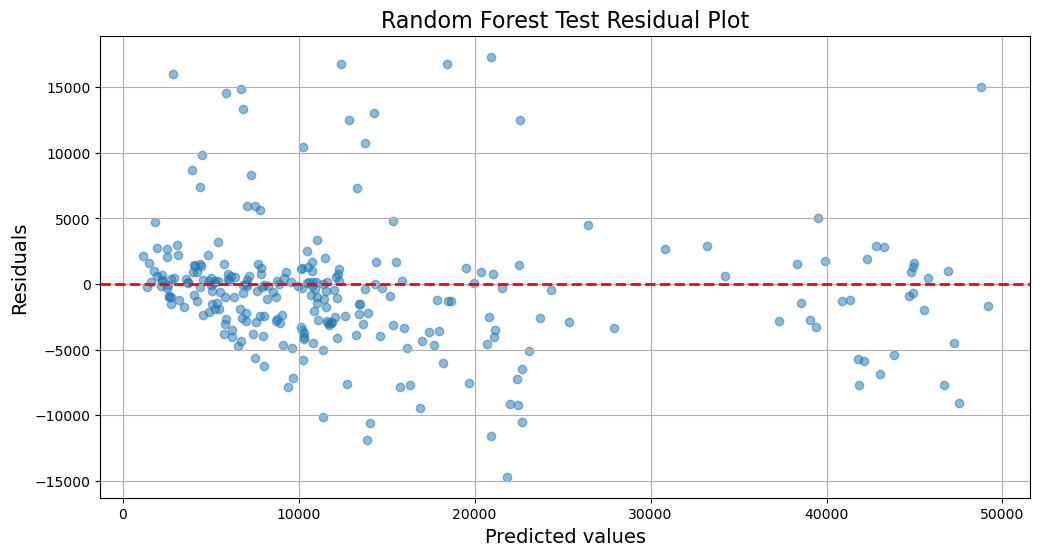

In [133]:
# 3가지 알고리즘 중 `Test의 검증지표 성능이 가장 높은 알고리즘의 Test 잔차를 시각화`

# Test 잔차 계산
residual_rf_test = Y_test_ME.squeeze() - Y_tepred_ME['Pred']

# 잔차 시각화
plt.figure(figsize=(12, 6))
plt.scatter(Y_tepred_ME, residual_rf_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Random Forest Test Residual Plot', fontsize=16)
plt.grid(True)
plt.show()


In [134]:
# 데이터에 남아있는 패턴이 어떤지 주석으로 설명


"""

- 잔차가 수평선(0)을 중심으로 고르게 퍼져 있지 않고,
  예측값이 낮을 때(왼쪽)보다 높을 때(오른쪽) 잔차의 분산이 더 커지는 경향이 있음
  → 이는 예측값이 클수록 모델이 실제 값을 정확히 맞추지 못하고 있다는 의미

- 잔차가 특정한 곡선 모양이나 경향성을 보인다면, 
  이는 모델이 데이터의 비선형적인 관계를 완벽하게 반영하지 못했을 가능성을 시사함

- 일부 예측값에서 잔차가 매우 크게 튀는 이상값(outlier)도 보임
  → 보험료가 매우 높거나 낮은 고객의 예측이 어려웠음을 의미

- 전체적으로 잔차가 0을 기준으로 어느 정도 대칭성을 보이긴 하지만,
  고예측값 영역에서 예측 오차가 커지는 경향이 있어 성능 개선의 여지가 있음

"""

'\n\n- 잔차가 수평선(0)을 중심으로 고르게 퍼져 있지 않고,\n  예측값이 낮을 때(왼쪽)보다 높을 때(오른쪽) 잔차의 분산이 더 커지는 경향이 있음\n  → 이는 예측값이 클수록 모델이 실제 값을 정확히 맞추지 못하고 있다는 의미\n\n- 잔차가 특정한 곡선 모양이나 경향성을 보인다면, \n  이는 모델이 데이터의 비선형적인 관계를 완벽하게 반영하지 못했을 가능성을 시사함\n\n- 일부 예측값에서 잔차가 매우 크게 튀는 이상값(outlier)도 보임\n  → 보험료가 매우 높거나 낮은 고객의 예측이 어려웠음을 의미\n\n- 전체적으로 잔차가 0을 기준으로 어느 정도 대칭성을 보이긴 하지만,\n  고예측값 영역에서 예측 오차가 커지는 경향이 있어 성능 개선의 여지가 있음\n\n'

In [135]:
# 향후 잔차의 패턴을 줄이고 모델링의 성능을 높이기 위해 `어떤 데이터 또는 전처리 추가/변경/삭제 등을 ` 고려해 볼 수 있는지 주석으로 작성

"""

1. 추가적인 설명 변수(feature) 확보
- 현재 변수 외에 고객의 직업, 수입, 병력 여부, 운동 습관 등 건강과 관련된 데이터를 추가 수집하면
  예측 정확도를 더 높일 수 있음
- 특히 보험료가 높은 사람들에 대한 설명력이 부족하므로, 해당 그룹에 특화된 정보 확보 필요

2. 이상치(outlier) 탐지 및 처리
- 잔차가 크게 튀는 일부 데이터는 이상치일 가능성이 있음
- IQR, Z-score 등으로 이상값을 탐지하고 제거하거나, 로그 변환 또는 클리핑 처리 고려

3. 변수 변환 및 스케일 조정
- 예: bmi, age, charges 변수에 로그(log)나 제곱근(sqrt) 변환을 적용하면 선형성이 개선될 수 있음
- 변수 간 상호작용(예: age * smoker, bmi * smoker) 피처를 추가하면 비선형 구조를 더 잘 반영할 수 있음

4. 범주형 변수 정제 및 그룹화
- region 등의 변수는 단순 One-Hot보다 더 의미 있는 그룹(예: 수도권 vs 비수도권 등)으로 묶으면 효과적일 수 있음
- sex 변수처럼 영향이 낮은 변수는 제거를 고려하거나, 그룹별로 모델을 분리해서 학습하는 것도 방법

5. 고예측값 영역에 집중한 모델링
- 예측값이 클수록 잔차가 커지는 문제를 해결하기 위해, 고비용 고객 그룹에 대해 별도 모델을 학습하거나
  cost-sensitive loss function 등을 사용하는 것도 고려 가능

6. 모델 튜닝 또는 앙상블 전략 강화
- Random Forest 파라미터 튜닝 (max_depth, min_samples_leaf 등)을 통해 과적합을 줄일 수 있음
- Gradient Boosting 계열과의 앙상블 또는 스태킹 모델을 구성하면 복잡한 패턴을 더 잘 학습할 수 있음

"""

'\n\n1. 추가적인 설명 변수(feature) 확보\n- 현재 변수 외에 고객의 직업, 수입, 병력 여부, 운동 습관 등 건강과 관련된 데이터를 추가 수집하면\n  예측 정확도를 더 높일 수 있음\n- 특히 보험료가 높은 사람들에 대한 설명력이 부족하므로, 해당 그룹에 특화된 정보 확보 필요\n\n2. 이상치(outlier) 탐지 및 처리\n- 잔차가 크게 튀는 일부 데이터는 이상치일 가능성이 있음\n- IQR, Z-score 등으로 이상값을 탐지하고 제거하거나, 로그 변환 또는 클리핑 처리 고려\n\n3. 변수 변환 및 스케일 조정\n- 예: bmi, age, charges 변수에 로그(log)나 제곱근(sqrt) 변환을 적용하면 선형성이 개선될 수 있음\n- 변수 간 상호작용(예: age * smoker, bmi * smoker) 피처를 추가하면 비선형 구조를 더 잘 반영할 수 있음\n\n4. 범주형 변수 정제 및 그룹화\n- region 등의 변수는 단순 One-Hot보다 더 의미 있는 그룹(예: 수도권 vs 비수도권 등)으로 묶으면 효과적일 수 있음\n- sex 변수처럼 영향이 낮은 변수는 제거를 고려하거나, 그룹별로 모델을 분리해서 학습하는 것도 방법\n\n5. 고예측값 영역에 집중한 모델링\n- 예측값이 클수록 잔차가 커지는 문제를 해결하기 위해, 고비용 고객 그룹에 대해 별도 모델을 학습하거나\n  cost-sensitive loss function 등을 사용하는 것도 고려 가능\n\n6. 모델 튜닝 또는 앙상블 전략 강화\n- Random Forest 파라미터 튜닝 (max_depth, min_samples_leaf 등)을 통해 과적합을 줄일 수 있음\n- Gradient Boosting 계열과의 앙상블 또는 스태킹 모델을 구성하면 복잡한 패턴을 더 잘 학습할 수 있음\n\n'

In [203]:
### 종료 및 본인정보 반영
# 반드시 이 cell을 실행하시오
# 실행하지 않을 시 직접 하지 않은 것으로 간주
# 마지막 줄 출력으로 파일명을 설정하고 제출 필수
import platform, psutil, os, datetime
print(platform.processor())
print(str(round(psutil.virtual_memory().total / (1024.0 **3)))+"(GB)")
print(platform.system())
print(platform.version())
print(os.getcwd())
print(datetime.datetime.fromtimestamp(os.path.getctime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getmtime(os.getcwd())))
print(datetime.datetime.fromtimestamp(os.path.getatime(os.getcwd())))
print(datetime.datetime.now())
title = 'DA_SupervisedRegression'    # 고정값
name = '이승희'    # 본인 이름을 작성
studentid = '202100839'    # 본인 학번을 작성
# 아래 강좌 명 중 본인이 수강하는 강과명 작성
# 비즈니스데이터사이언스이해, E정보시스템, 디지털비즈니스애널리틱스, E데이터베이스, 인공지능기반의사결정, 빅데이터 등
# 비즈니스혁신을위한데이터사이언스응용, 인공지능활용디지털경제플랫폼연구 등
course = '디지털비즈니스애널리틱스'
print('다음 출력을 파일명으로 설정하고 제출하시오:', name + '_' + studentid + '_' + course + '_' + title)

Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
8(GB)
Windows
10.0.26100
C:\Users\82102\디지털비즈니스애널리틱스
2025-03-06 21:43:15.432005
2025-05-07 15:28:13.513454
2025-05-07 15:28:39.744119
2025-05-07 15:28:40.710210
다음 출력을 파일명으로 설정하고 제출하시오: 이승희_202100839_디지털비즈니스애널리틱스_DA_SupervisedRegression
